# Bayesian Sampler Examples

Examples of running each sampler avaiable in 3ML.


Before, that, let's discuss setting up configuration default sampler with default parameters. We can set in our configuration a default algorithm and default setup parameters for the samplers. This can ease fitting when we are doing exploratory data analysis.

With any of the samplers, you can pass keywords to access their setups. Read each pacakges documentation for more details.


In [1]:
from threeML import *
from threeML.plugins.XYLike import XYLike

import numpy as np
import dynesty
from jupyterthemes import jtplot

%matplotlib inline
jtplot.style(context="talk", fscale=1, ticks=True, grid=False)
silence_warnings()
set_threeML_style()

22:21:32 WARNING   The naima package is not available. Models that depend on it will not be         ]8;id=603369;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=158499;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#48\48]8;;\
                  available                                                                                        

         WARNING   The GSL library or the pygsl wrapper cannot be loaded. Models that depend on it  ]8;id=538195;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py\functions.py]8;;\:]8;id=557046;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/functions.py#69\69]8;;\
                  will not be available.                                                                           

22:21:33 WARNING   The ebltable package is not available. Models that depend on it will not be     ]8;id=767160;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py\absorption.py]8;;\:]8;id=73099;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/functions/functions_1D/absorption.py#33\33]8;;\
                  available                                                                                        

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=899644;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=584349;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=739318;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=691984;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=191043;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=43538;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=952734;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=789015;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of F to 1e-99 because there was a postive transform   ]8;id=837227;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=132073;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

         WARNING   We have set the min_value of K to 1e-99 because there was a postive transform   ]8;id=963592;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py\parameter.py]8;;\:]8;id=803443;file:///usr/local/miniconda/envs/test_env/lib/python3.9/site-packages/astromodels/core/parameter.py#704\704]8;;\

In [2]:
threeML_config.bayesian.default_sampler

<Sampler.emcee: 'emcee'>

In [3]:
threeML_config.bayesian.emcee_setup

{'n_burnin': None, 'n_iterations': 500, 'n_walkers': 50, 'seed': 5123}

If you simply run `bayes_analysis.sample()` the default sampler and its default parameters will be used.


Let's make some data to fit.

22:21:36 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=657495;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=682180;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#92\92]8;;\

22:21:39 INFO      Using Gaussian statistic (equivalent to chi^2) with the provided errors.            ]8;id=783462;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py\XYLike.py]8;;\:]8;id=725064;file:///Users/runner/work/threeML/threeML/threeML/plugins/XYLike.py#92\92]8;;\

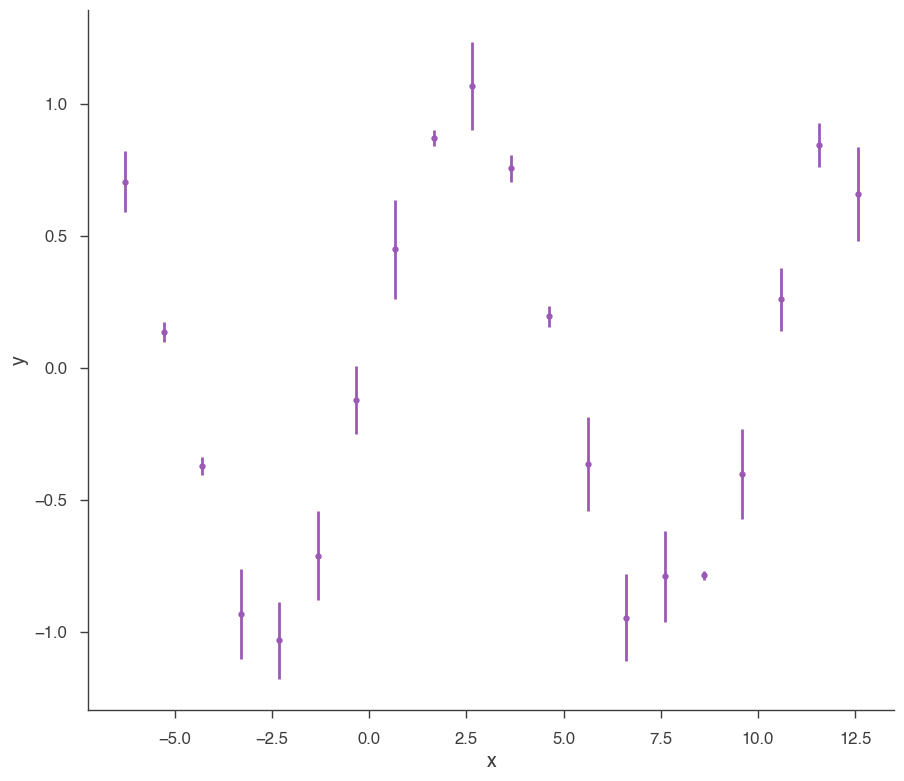

In [4]:
sin = Sin(K=1, f=0.1)
sin.phi.fix = True
sin.K.prior = Log_uniform_prior(lower_bound=0.5, upper_bound=1.5)
sin.f.prior = Uniform_prior(lower_bound=0, upper_bound=0.5)

model = Model(PointSource("demo", 0, 0, spectral_shape=sin))

x = np.linspace(-2 * np.pi, 4 * np.pi, 20)
yerr = np.random.uniform(0.01, 0.2, 20)


xyl = XYLike.from_function("demo", sin, x, yerr)
xyl.plot()

bayes_analysis = BayesianAnalysis(model, DataList(xyl))

## emcee

         INFO      sampler set to emcee                                                    ]8;id=189486;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=135180;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

  0%|          | 0/125 [00:00<?, ?it/s]

  0%|          | 0/500 [00:00<?, ?it/s]

22:21:46 INFO      Mean acceptance fraction: 0.7266999999999999                                ]8;id=516010;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py\emcee_sampler.py]8;;\:]8;id=95305;file:///Users/runner/work/threeML/threeML/threeML/bayesian/emcee_sampler.py#157\157]8;;\

22:21:47 INFO      fit restored to maximum of posterior                                         ]8;id=669874;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=149269;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=328954;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=290529;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.93 -0.18 +0.21) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 -0.05 +0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.559392
total,-6.559392


Values of statistical measures:

,statistical measures
AIC,17.824667
BIC,19.110249
DIC,17.030746
PDIC,1.941019


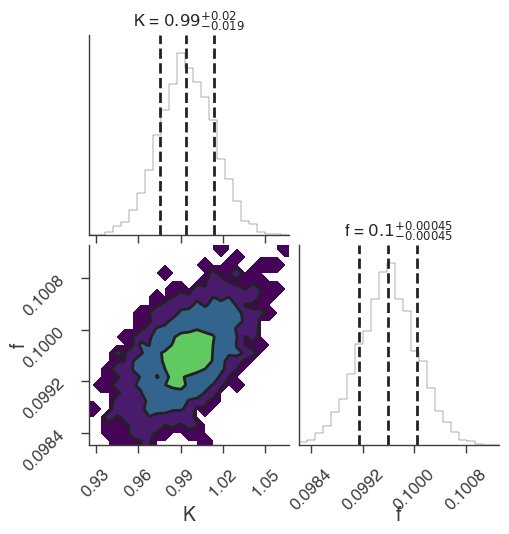

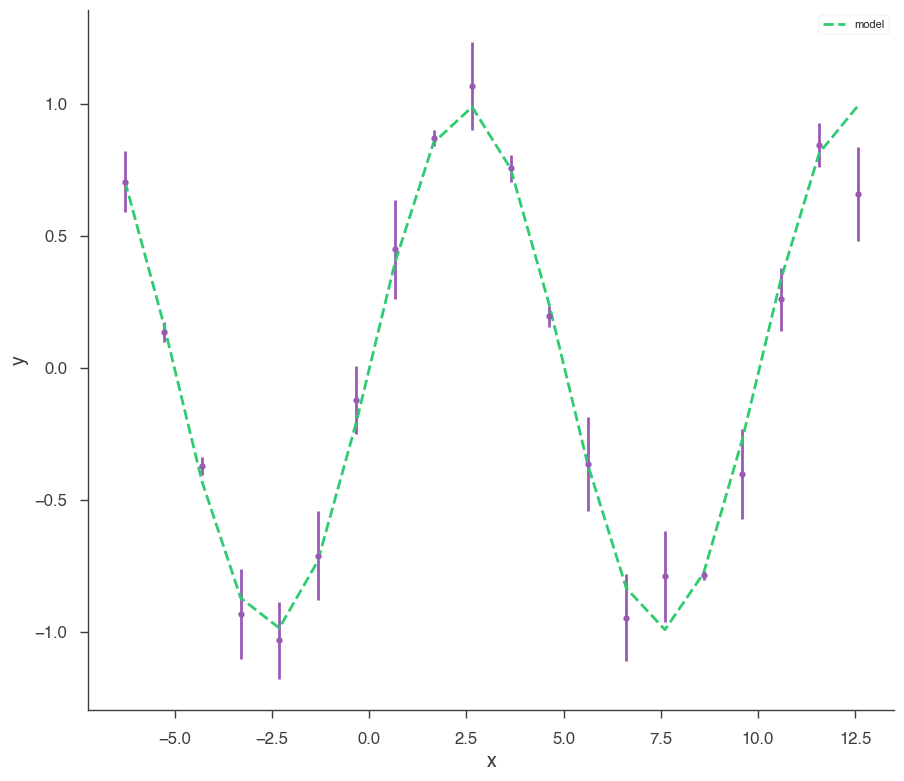

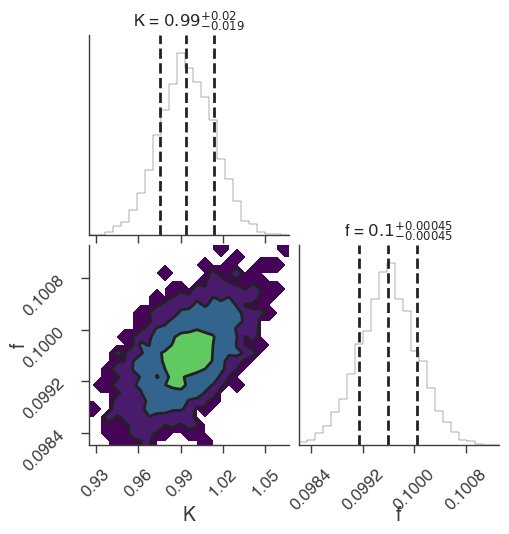

In [5]:
bayes_analysis.set_sampler("emcee")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## multinest

22:21:49 INFO      sampler set to multinest                                                ]8;id=873944;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=784443;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

 *****************************************************
 MultiNest v3.10
 Copyright Farhan Feroz & Mike Hobson
 Release Jul 2015

 no. of live points =  400
 dimensionality =    2
 *****************************************************


  analysing data from chains/fit-.txt ln(ev)=  -15.583153661610655      +/-  0.14198574960347674     
 Total Likelihood Evaluations:         5518
 Sampling finished. Exiting MultiNest



22:21:50 INFO      fit restored to maximum of posterior                                         ]8;id=898404;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=681470;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=215669;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=71188;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.92 +/- 0.19) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 -0.04 +0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.560692
total,-6.560692


Values of statistical measures:

,statistical measures
AIC,17.827266
BIC,19.112848
DIC,16.982974
PDIC,1.931464
log(Z),-6.767678


         INFO      deleting the chain directory chains                                     ]8;id=453263;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py\multinest_sampler.py]8;;\:]8;id=539089;file:///Users/runner/work/threeML/threeML/threeML/bayesian/multinest_sampler.py#255\255]8;;\

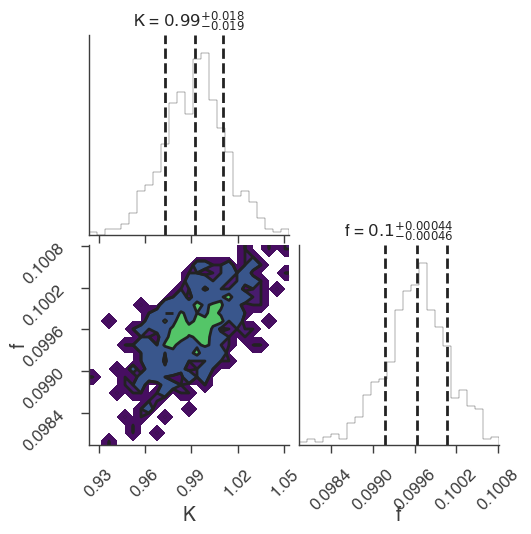

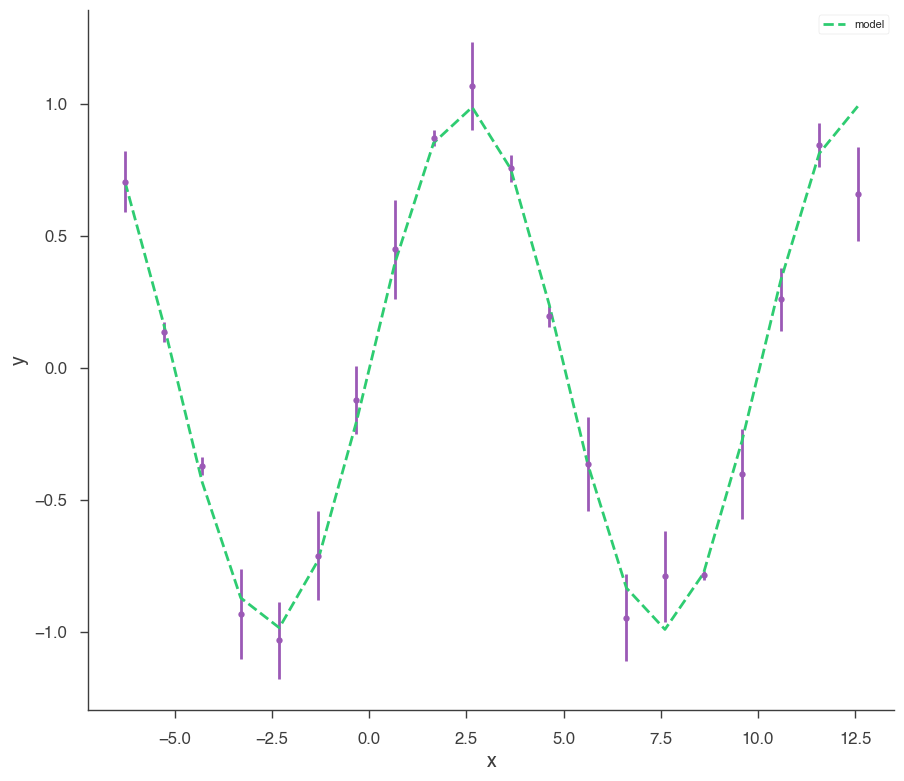

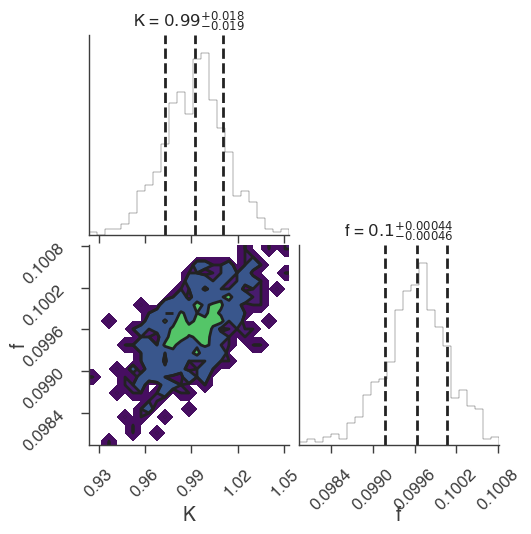

In [6]:
bayes_analysis.set_sampler("multinest")
bayes_analysis.sampler.setup(n_live_points=400, resume=False, auto_clean=True)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## dynesty

22:21:53 INFO      sampler set to dynesty_nested                                           ]8;id=178720;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=700226;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

125it [00:00, 1249.97it/s, bound: 0 | nc: 1 | ncall: 551 | eff(%): 22.686 | loglstar:   -inf < -5164.172 <    inf | logz: -5171.139 +/-  0.131 | dlogz: 5149.074 >  0.409]

250it [00:00, 1157.06it/s, bound: 0 | nc: 3 | ncall: 752 | eff(%): 33.245 | loglstar:   -inf < -3500.990 <    inf | logz: -3508.298 +/-  0.135 | dlogz: 3489.565 >  0.409]

367it [00:00, 1014.22it/s, bound: 0 | nc: 1 | ncall: 999 | eff(%): 36.737 | loglstar:   -inf < -2626.289 <    inf | logz: -2633.409 +/-  0.128 | dlogz: 2624.072 >  0.409]

471it [00:00, 506.27it/s, bound: 0 | nc: 2 | ncall: 1344 | eff(%): 35.045 | loglstar:   -inf < -2125.616 <    inf | logz: -2133.469 +/-  0.140 | dlogz: 2127.594 >  0.409]

544it [00:01, 395.96it/s, bound: 0 | nc: 2 | ncall: 1588 | eff(%): 34.257 | loglstar:   -inf < -1826.765 <    inf | logz: -1834.807 +/-  0.142 | dlogz: 1832.354 >  0.409]

600it [00:01, 320.49it/s, bound: 0 | nc: 5 | ncall: 1895 | eff(%): 31.662 | loglstar:   -inf < -1628.910 <    inf | logz: -1636.824 +/-  0.137 | dlogz: 1628.417 >  0.409]

644it [00:01, 296.95it/s, bound: 0 | nc: 7 | ncall: 2088 | eff(%): 30.843 | loglstar:   -inf < -1508.188 <    inf | logz: -1516.382 +/-  0.140 | dlogz: 1508.506 >  0.409]

681it [00:01, 260.12it/s, bound: 0 | nc: 8 | ncall: 2380 | eff(%): 28.613 | loglstar:   -inf < -1426.535 <    inf | logz: -1434.808 +/-  0.141 | dlogz: 1426.886 >  0.409]

713it [00:01, 269.78it/s, bound: 0 | nc: 2 | ncall: 2549 | eff(%): 27.972 | loglstar:   -inf < -1360.663 <    inf | logz: -1368.884 +/-  0.136 | dlogz: 1359.772 >  0.409]

745it [00:01, 279.05it/s, bound: 0 | nc: 8 | ncall: 2735 | eff(%): 27.239 | loglstar:   -inf < -1313.609 <    inf | logz: -1321.489 +/-  0.133 | dlogz: 1311.587 >  0.409]

778it [00:02, 288.77it/s, bound: 0 | nc: 6 | ncall: 2901 | eff(%): 26.818 | loglstar:   -inf < -1246.957 <    inf | logz: -1254.498 +/-  0.135 | dlogz: 1244.559 >  0.409]

810it [00:02, 264.54it/s, bound: 0 | nc: 7 | ncall: 3125 | eff(%): 25.920 | loglstar:   -inf < -1201.320 <    inf | logz: -1208.418 +/-  0.130 | dlogz: 1197.840 >  0.409]

839it [00:02, 240.17it/s, bound: 0 | nc: 4 | ncall: 3349 | eff(%): 25.052 | loglstar:   -inf < -1169.994 <    inf | logz: -1178.261 +/-  0.132 | dlogz: 1168.205 >  0.409]

865it [00:02, 212.01it/s, bound: 0 | nc: 47 | ncall: 3619 | eff(%): 23.902 | loglstar:   -inf < -1146.824 <    inf | logz: -1155.042 +/-  0.134 | dlogz: 1144.845 >  0.409]

888it [00:02, 194.03it/s, bound: 0 | nc: 18 | ncall: 3928 | eff(%): 22.607 | loglstar:   -inf < -1113.787 <    inf | logz: -1121.057 +/-  0.132 | dlogz: 1110.291 >  0.409]

914it [00:02, 200.44it/s, bound: 0 | nc: 57 | ncall: 4142 | eff(%): 22.067 | loglstar:   -inf < -1087.630 <    inf | logz: -1095.621 +/-  0.133 | dlogz: 1085.089 >  0.409]

937it [00:02, 205.46it/s, bound: 0 | nc: 15 | ncall: 4368 | eff(%): 21.451 | loglstar:   -inf < -1061.128 <    inf | logz: -1068.858 +/-  0.136 | dlogz: 1058.075 >  0.409]

959it [00:03, 184.45it/s, bound: 0 | nc: 1 | ncall: 4594 | eff(%): 20.875 | loglstar:   -inf < -1037.847 <    inf | logz: -1046.309 +/-  0.138 | dlogz: 1036.121 >  0.409] 

979it [00:03, 161.51it/s, bound: 0 | nc: 19 | ncall: 4906 | eff(%): 19.955 | loglstar:   -inf < -1022.385 <    inf | logz: -1029.923 +/-  0.130 | dlogz: 1018.933 >  0.409]

996it [00:03, 147.31it/s, bound: 0 | nc: 75 | ncall: 5131 | eff(%): 19.411 | loglstar:   -inf < -1011.892 <    inf | logz: -1019.682 +/-  0.130 | dlogz: 1008.628 >  0.409]

1012it [00:03, 141.09it/s, bound: 0 | nc: 46 | ncall: 5326 | eff(%): 19.001 | loglstar:   -inf < -995.538 <    inf | logz: -1004.057 +/-  0.138 | dlogz: 993.459 >  0.409] 

1028it [00:03, 137.26it/s, bound: 0 | nc: 13 | ncall: 5478 | eff(%): 18.766 | loglstar:   -inf < -974.967 <    inf | logz: -983.646 +/-  0.142 | dlogz: 973.467 >  0.409] 

1042it [00:03, 135.11it/s, bound: 0 | nc: 17 | ncall: 5661 | eff(%): 18.407 | loglstar:   -inf < -938.404 <    inf | logz: -947.690 +/-  0.152 | dlogz: 947.183 >  0.409]

1056it [00:03, 133.75it/s, bound: 0 | nc: 4 | ncall: 5867 | eff(%): 17.999 | loglstar:   -inf < -870.471 <    inf | logz: -879.792 +/-  0.153 | dlogz: 877.169 >  0.409] 

1070it [00:03, 115.82it/s, bound: 0 | nc: 7 | ncall: 6016 | eff(%): 17.786 | loglstar:   -inf < -844.093 <    inf | logz: -853.409 +/-  0.151 | dlogz: 845.367 >  0.409]

1088it [00:04, 130.97it/s, bound: 0 | nc: 12 | ncall: 6302 | eff(%): 17.264 | loglstar:   -inf < -770.618 <    inf | logz: -779.161 +/-  0.143 | dlogz: 768.613 >  0.409]

1107it [00:04, 142.80it/s, bound: 0 | nc: 42 | ncall: 6578 | eff(%): 16.829 | loglstar:   -inf < -722.009 <    inf | logz: -730.995 +/-  0.145 | dlogz: 721.094 >  0.409]

1127it [00:04, 157.27it/s, bound: 0 | nc: 8 | ncall: 6797 | eff(%): 16.581 | loglstar:   -inf < -682.255 <    inf | logz: -691.720 +/-  0.152 | dlogz: 684.066 >  0.409] 

1144it [00:04, 109.35it/s, bound: 0 | nc: 37 | ncall: 7078 | eff(%): 16.163 | loglstar:   -inf < -638.077 <    inf | logz: -647.416 +/-  0.148 | dlogz: 637.904 >  0.409]

1158it [00:04, 89.60it/s, bound: 0 | nc: 8 | ncall: 7427 | eff(%): 15.592 | loglstar:   -inf < -615.332 <    inf | logz: -624.561 +/-  0.148 | dlogz: 614.847 >  0.409]  

1170it [00:04, 86.20it/s, bound: 0 | nc: 8 | ncall: 7570 | eff(%): 15.456 | loglstar:   -inf < -597.484 <    inf | logz: -605.880 +/-  0.142 | dlogz: 595.003 >  0.409]

1181it [00:05, 89.35it/s, bound: 0 | nc: 6 | ncall: 7736 | eff(%): 15.266 | loglstar:   -inf < -578.603 <    inf | logz: -587.080 +/-  0.144 | dlogz: 576.375 >  0.409]

1192it [00:05, 92.93it/s, bound: 0 | nc: 8 | ncall: 7889 | eff(%): 15.110 | loglstar:   -inf < -561.625 <    inf | logz: -571.099 +/-  0.150 | dlogz: 561.760 >  0.409]

1203it [00:05, 95.79it/s, bound: 0 | nc: 7 | ncall: 8093 | eff(%): 14.865 | loglstar:   -inf < -543.519 <    inf | logz: -552.560 +/-  0.144 | dlogz: 542.024 >  0.409]

1214it [00:05, 92.97it/s, bound: 0 | nc: 3 | ncall: 8318 | eff(%): 14.595 | loglstar:   -inf < -527.196 <    inf | logz: -536.311 +/-  0.146 | dlogz: 525.914 >  0.409]

1224it [00:05, 93.01it/s, bound: 0 | nc: 2 | ncall: 8419 | eff(%): 14.539 | loglstar:   -inf < -515.874 <    inf | logz: -524.388 +/-  0.141 | dlogz: 513.315 >  0.409]

1235it [00:05, 94.91it/s, bound: 0 | nc: 50 | ncall: 8637 | eff(%): 14.299 | loglstar:   -inf < -504.326 <    inf | logz: -512.941 +/-  0.141 | dlogz: 501.887 >  0.409]

1245it [00:05, 95.55it/s, bound: 0 | nc: 9 | ncall: 8793 | eff(%): 14.159 | loglstar:   -inf < -485.246 <    inf | logz: -494.822 +/-  0.151 | dlogz: 485.170 >  0.409] 

1255it [00:05, 81.66it/s, bound: 0 | nc: 18 | ncall: 9043 | eff(%): 13.878 | loglstar:   -inf < -474.647 <    inf | logz: -482.871 +/-  0.138 | dlogz: 471.508 >  0.409]

1264it [00:06, 78.47it/s, bound: 0 | nc: 33 | ncall: 9238 | eff(%): 13.683 | loglstar:   -inf < -459.181 <    inf | logz: -468.385 +/-  0.144 | dlogz: 457.595 >  0.409]

1274it [00:06, 80.17it/s, bound: 0 | nc: 21 | ncall: 9460 | eff(%): 13.467 | loglstar:   -inf < -444.861 <    inf | logz: -453.613 +/-  0.144 | dlogz: 442.609 >  0.409]

1287it [00:06, 91.81it/s, bound: 0 | nc: 16 | ncall: 9675 | eff(%): 13.302 | loglstar:   -inf < -436.358 <    inf | logz: -444.734 +/-  0.142 | dlogz: 433.319 >  0.409]

1297it [00:06, 90.95it/s, bound: 0 | nc: 44 | ncall: 9855 | eff(%): 13.161 | loglstar:   -inf < -425.373 <    inf | logz: -434.267 +/-  0.141 | dlogz: 424.100 >  0.409]

1307it [00:06, 77.81it/s, bound: 0 | nc: 2 | ncall: 10300 | eff(%): 12.689 | loglstar:   -inf < -408.573 <    inf | logz: -417.914 +/-  0.146 | dlogz: 408.287 >  0.409]

1320it [00:06, 89.04it/s, bound: 0 | nc: 36 | ncall: 10539 | eff(%): 12.525 | loglstar:   -inf < -398.480 <    inf | logz: -406.828 +/-  0.139 | dlogz: 396.387 >  0.409]

1330it [00:06, 86.17it/s, bound: 0 | nc: 4 | ncall: 10847 | eff(%): 12.261 | loglstar:   -inf < -389.712 <    inf | logz: -398.737 +/-  0.146 | dlogz: 388.818 >  0.409] 

1339it [00:06, 81.00it/s, bound: 0 | nc: 30 | ncall: 11091 | eff(%): 12.073 | loglstar:   -inf < -381.282 <    inf | logz: -390.136 +/-  0.142 | dlogz: 379.755 >  0.409]

1350it [00:07, 88.22it/s, bound: 0 | nc: 38 | ncall: 11297 | eff(%): 11.950 | loglstar:   -inf < -373.193 <    inf | logz: -381.524 +/-  0.137 | dlogz: 370.854 >  0.409]

1360it [00:07, 87.57it/s, bound: 0 | nc: 21 | ncall: 11508 | eff(%): 11.818 | loglstar:   -inf < -368.420 <    inf | logz: -377.085 +/-  0.140 | dlogz: 366.643 >  0.409]

1369it [00:07, 77.17it/s, bound: 0 | nc: 47 | ncall: 11782 | eff(%): 11.619 | loglstar:   -inf < -362.261 <    inf | logz: -371.013 +/-  0.142 | dlogz: 360.549 >  0.409]

1382it [00:07, 86.05it/s, bound: 0 | nc: 98 | ncall: 12110 | eff(%): 11.412 | loglstar:   -inf < -356.040 <    inf | logz: -364.707 +/-  0.138 | dlogz: 354.140 >  0.409]

1391it [00:07, 78.96it/s, bound: 0 | nc: 71 | ncall: 12419 | eff(%): 11.201 | loglstar:   -inf < -351.718 <    inf | logz: -360.275 +/-  0.140 | dlogz: 349.623 >  0.409]

1400it [00:07, 77.20it/s, bound: 0 | nc: 7 | ncall: 12732 | eff(%): 10.996 | loglstar:   -inf < -343.209 <    inf | logz: -352.387 +/-  0.143 | dlogz: 341.919 >  0.409] 

1410it [00:07, 79.38it/s, bound: 0 | nc: 111 | ncall: 13047 | eff(%): 10.807 | loglstar:   -inf < -337.351 <    inf | logz: -345.580 +/-  0.141 | dlogz: 334.752 >  0.409]

1419it [00:07, 70.63it/s, bound: 0 | nc: 6 | ncall: 13470 | eff(%): 10.535 | loglstar:   -inf < -331.792 <    inf | logz: -340.568 +/-  0.141 | dlogz: 329.932 >  0.409]  

1427it [00:08, 67.67it/s, bound: 0 | nc: 43 | ncall: 13774 | eff(%): 10.360 | loglstar:   -inf < -327.210 <    inf | logz: -336.322 +/-  0.144 | dlogz: 325.896 >  0.409]

1440it [00:08, 81.22it/s, bound: 0 | nc: 45 | ncall: 14032 | eff(%): 10.262 | loglstar:   -inf < -323.317 <    inf | logz: -331.767 +/-  0.138 | dlogz: 320.889 >  0.409]

1449it [00:08, 76.48it/s, bound: 0 | nc: 51 | ncall: 14353 | eff(%): 10.095 | loglstar:   -inf < -316.812 <    inf | logz: -325.899 +/-  0.143 | dlogz: 315.335 >  0.409]

1457it [00:08, 52.66it/s, bound: 1 | nc: 1 | ncall: 14567 | eff(%): 10.002 | loglstar:   -inf < -310.544 <    inf | logz: -319.413 +/-  0.144 | dlogz: 308.701 >  0.409] 

1570it [00:08, 262.01it/s, bound: 1 | nc: 1 | ncall: 14741 | eff(%): 10.651 | loglstar:   -inf < -230.516 <    inf | logz: -239.861 +/-  0.144 | dlogz: 228.847 >  0.409]

1652it [00:08, 381.95it/s, bound: 1 | nc: 4 | ncall: 14920 | eff(%): 11.072 | loglstar:   -inf < -188.954 <    inf | logz: -198.211 +/-  0.147 | dlogz: 186.976 >  0.409]

1724it [00:08, 461.24it/s, bound: 1 | nc: 1 | ncall: 15100 | eff(%): 11.417 | loglstar:   -inf < -157.646 <    inf | logz: -166.804 +/-  0.144 | dlogz: 155.199 >  0.409]

1782it [00:09, 358.53it/s, bound: 2 | nc: 1 | ncall: 15207 | eff(%): 11.718 | loglstar:   -inf < -141.837 <    inf | logz: -150.667 +/-  0.140 | dlogz: 138.792 >  0.409]

1893it [00:09, 514.70it/s, bound: 2 | nc: 5 | ncall: 15385 | eff(%): 12.304 | loglstar:   -inf < -113.658 <    inf | logz: -123.150 +/-  0.147 | dlogz: 112.062 >  0.409]

1985it [00:09, 607.06it/s, bound: 2 | nc: 2 | ncall: 15558 | eff(%): 12.759 | loglstar:   -inf < -92.692 <    inf | logz: -102.436 +/-  0.146 | dlogz: 91.128 >  0.409]  

2059it [00:09, 637.34it/s, bound: 2 | nc: 3 | ncall: 15749 | eff(%): 13.074 | loglstar:   -inf < -77.473 <    inf | logz: -86.902 +/-  0.147 | dlogz: 75.288 >  0.409] 

2133it [00:09, 318.72it/s, bound: 3 | nc: 1 | ncall: 15852 | eff(%): 13.456 | loglstar:   -inf < -65.273 <    inf | logz: -74.475 +/-  0.144 | dlogz: 62.604 >  0.409]

2189it [00:10, 342.22it/s, bound: 3 | nc: 1 | ncall: 15942 | eff(%): 13.731 | loglstar:   -inf < -58.288 <    inf | logz: -67.694 +/-  0.145 | dlogz: 55.698 >  0.409]

2242it [00:10, 361.54it/s, bound: 3 | nc: 1 | ncall: 16030 | eff(%): 13.986 | loglstar:   -inf < -51.425 <    inf | logz: -60.781 +/-  0.145 | dlogz: 48.627 >  0.409]

2292it [00:10, 317.04it/s, bound: 3 | nc: 1 | ncall: 16128 | eff(%): 14.211 | loglstar:   -inf < -46.522 <    inf | logz: -56.157 +/-  0.145 | dlogz: 43.886 >  0.409]

2361it [00:10, 360.44it/s, bound: 3 | nc: 10 | ncall: 16283 | eff(%): 14.500 | loglstar:   -inf < -39.658 <    inf | logz: -49.305 +/-  0.147 | dlogz: 36.852 >  0.409]

2406it [00:11, 168.83it/s, bound: 4 | nc: 1 | ncall: 16390 | eff(%): 14.680 | loglstar:   -inf < -36.390 <    inf | logz: -45.783 +/-  0.145 | dlogz: 33.184 >  0.409] 

2439it [00:11, 184.07it/s, bound: 4 | nc: 1 | ncall: 16430 | eff(%): 14.845 | loglstar:   -inf < -34.003 <    inf | logz: -43.398 +/-  0.145 | dlogz: 30.707 >  0.409]

2502it [00:11, 242.56it/s, bound: 4 | nc: 1 | ncall: 16521 | eff(%): 15.144 | loglstar:   -inf < -30.084 <    inf | logz: -39.136 +/-  0.144 | dlogz: 26.261 >  0.409]

2543it [00:11, 258.95it/s, bound: 4 | nc: 1 | ncall: 16583 | eff(%): 15.335 | loglstar:   -inf < -27.586 <    inf | logz: -36.883 +/-  0.145 | dlogz: 23.913 >  0.409]

2598it [00:11, 311.39it/s, bound: 4 | nc: 4 | ncall: 16683 | eff(%): 15.573 | loglstar:   -inf < -25.170 <    inf | logz: -34.478 +/-  0.143 | dlogz: 21.363 >  0.409]

2641it [00:11, 331.91it/s, bound: 4 | nc: 4 | ncall: 16757 | eff(%): 15.761 | loglstar:   -inf < -22.812 <    inf | logz: -32.523 +/-  0.146 | dlogz: 19.376 >  0.409]

2684it [00:11, 330.33it/s, bound: 4 | nc: 3 | ncall: 16863 | eff(%): 15.917 | loglstar:   -inf < -21.246 <    inf | logz: -30.610 +/-  0.146 | dlogz: 17.334 >  0.409]

2724it [00:12, 194.92it/s, bound: 5 | nc: 1 | ncall: 16971 | eff(%): 16.051 | loglstar:   -inf < -19.452 <    inf | logz: -28.982 +/-  0.146 | dlogz: 15.611 >  0.409]

2814it [00:12, 303.45it/s, bound: 5 | nc: 1 | ncall: 17082 | eff(%): 16.473 | loglstar:   -inf < -17.018 <    inf | logz: -26.276 +/-  0.144 | dlogz: 12.666 >  0.409]

2899it [00:12, 402.44it/s, bound: 5 | nc: 2 | ncall: 17203 | eff(%): 16.852 | loglstar:   -inf < -15.240 <    inf | logz: -24.520 +/-  0.144 | dlogz: 10.728 >  0.409]

2958it [00:12, 426.61it/s, bound: 5 | nc: 1 | ncall: 17307 | eff(%): 17.091 | loglstar:   -inf < -14.160 <    inf | logz: -23.491 +/-  0.144 | dlogz:  9.549 >  0.409]

3018it [00:12, 464.67it/s, bound: 5 | nc: 2 | ncall: 17419 | eff(%): 17.326 | loglstar:   -inf < -13.153 <    inf | logz: -22.531 +/-  0.144 | dlogz:  8.439 >  0.409]

3076it [00:12, 465.87it/s, bound: 5 | nc: 4 | ncall: 17554 | eff(%): 17.523 | loglstar:   -inf < -12.155 <    inf | logz: -21.634 +/-  0.145 | dlogz:  7.396 >  0.409]

3131it [00:13, 232.13it/s, bound: 6 | nc: 1 | ncall: 17626 | eff(%): 17.764 | loglstar:   -inf < -11.441 <    inf | logz: -20.879 +/-  0.145 | dlogz:  6.502 >  0.409]

3212it [00:13, 314.77it/s, bound: 6 | nc: 2 | ncall: 17745 | eff(%): 18.101 | loglstar:   -inf < -10.581 <    inf | logz: -19.989 +/-  0.145 | dlogz:  5.410 >  0.409]

3307it [00:13, 422.40it/s, bound: 6 | nc: 3 | ncall: 17900 | eff(%): 18.475 | loglstar:   -inf < -9.788 <    inf | logz: -19.166 +/-  0.145 | dlogz:  4.362 >  0.409] 

3373it [00:13, 452.83it/s, bound: 6 | nc: 1 | ncall: 18052 | eff(%): 18.685 | loglstar:   -inf < -9.339 <    inf | logz: -18.697 +/-  0.145 | dlogz:  3.739 >  0.409]

3436it [00:14, 281.25it/s, bound: 7 | nc: 1 | ncall: 18183 | eff(%): 18.897 | loglstar:   -inf < -8.989 <    inf | logz: -18.329 +/-  0.145 | dlogz:  3.229 >  0.409]

3534it [00:14, 377.72it/s, bound: 7 | nc: 1 | ncall: 18304 | eff(%): 19.307 | loglstar:   -inf < -8.463 <    inf | logz: -17.848 +/-  0.145 | dlogz:  2.544 >  0.409]

3609it [00:14, 429.36it/s, bound: 7 | nc: 2 | ncall: 18413 | eff(%): 19.600 | loglstar:   -inf < -8.118 <    inf | logz: -17.541 +/-  0.145 | dlogz:  2.098 >  0.409]

3678it [00:14, 469.01it/s, bound: 7 | nc: 2 | ncall: 18554 | eff(%): 19.823 | loglstar:   -inf < -7.894 <    inf | logz: -17.305 +/-  0.145 | dlogz:  1.749 >  0.409]

3740it [00:14, 487.29it/s, bound: 7 | nc: 1 | ncall: 18704 | eff(%): 19.996 | loglstar:   -inf < -7.733 <    inf | logz: -17.129 +/-  0.145 | dlogz:  1.485 >  0.409]

3800it [00:15, 242.79it/s, bound: 8 | nc: 1 | ncall: 18806 | eff(%): 20.206 | loglstar:   -inf < -7.572 <    inf | logz: -16.981 +/-  0.145 | dlogz:  1.263 >  0.409]

3845it [00:15, 259.22it/s, bound: 8 | nc: 2 | ncall: 18867 | eff(%): 20.379 | loglstar:   -inf < -7.478 <    inf | logz: -16.883 +/-  0.145 | dlogz:  1.117 >  0.409]

3887it [00:15, 283.32it/s, bound: 8 | nc: 1 | ncall: 18927 | eff(%): 20.537 | loglstar:   -inf < -7.370 <    inf | logz: -16.800 +/-  0.145 | dlogz:  0.994 >  0.409]

3997it [00:15, 430.14it/s, bound: 8 | nc: 1 | ncall: 19109 | eff(%): 20.917 | loglstar:   -inf < -7.156 <    inf | logz: -16.614 +/-  0.145 | dlogz:  0.729 >  0.409]

4059it [00:15, 445.34it/s, bound: 8 | nc: 2 | ncall: 19286 | eff(%): 21.046 | loglstar:   -inf < -7.059 <    inf | logz: -16.528 +/-  0.145 | dlogz:  0.612 >  0.409]

4117it [00:16, 279.83it/s, bound: 9 | nc: 1 | ncall: 19395 | eff(%): 21.227 | loglstar:   -inf < -6.997 <    inf | logz: -16.459 +/-  0.145 | dlogz:  0.520 >  0.409]

4182it [00:16, 336.83it/s, bound: 9 | nc: 1 | ncall: 19474 | eff(%): 21.475 | loglstar:   -inf < -6.944 <    inf | logz: -16.394 +/-  0.145 | dlogz:  0.433 >  0.409]

4202it [00:16, 255.53it/s, +400 | bound: 9 | nc: 1 | ncall: 19902 | eff(%): 23.598 | loglstar:   -inf < -6.567 <    inf | logz: -16.023 +/-  0.146 | dlogz:  0.001 >  0.409]

22:22:10 INFO      fit restored to maximum of posterior                                         ]8;id=76630;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=172437;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=902507;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=112701;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.92 -0.21 +0.20) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 +/- 0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.55948
total,-6.55948


Values of statistical measures:

,statistical measures
AIC,17.824842
BIC,19.110425
DIC,17.223194
PDIC,2.051792
log(Z),-6.958574


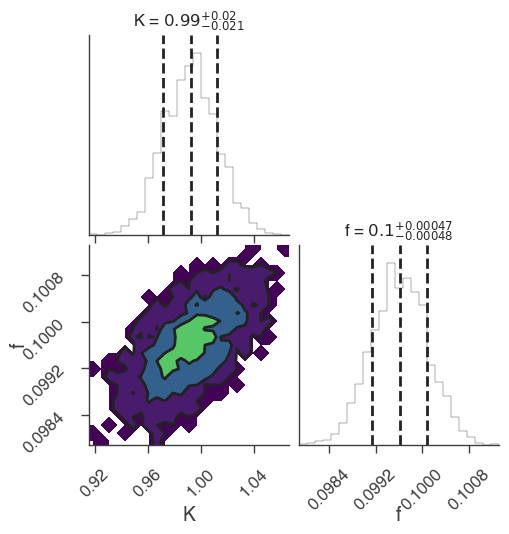

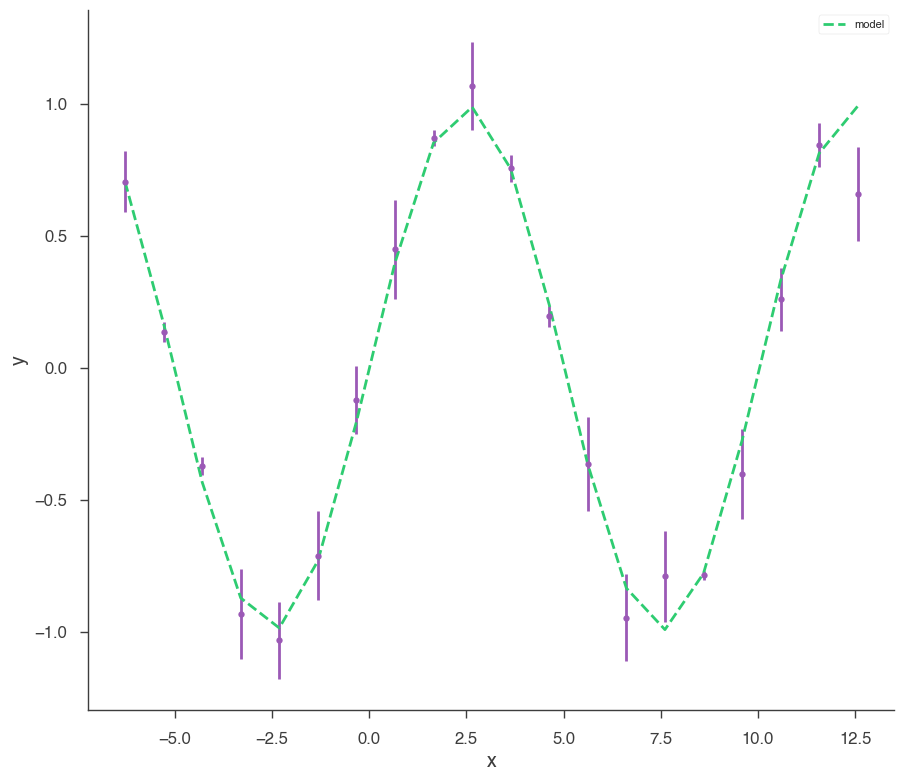

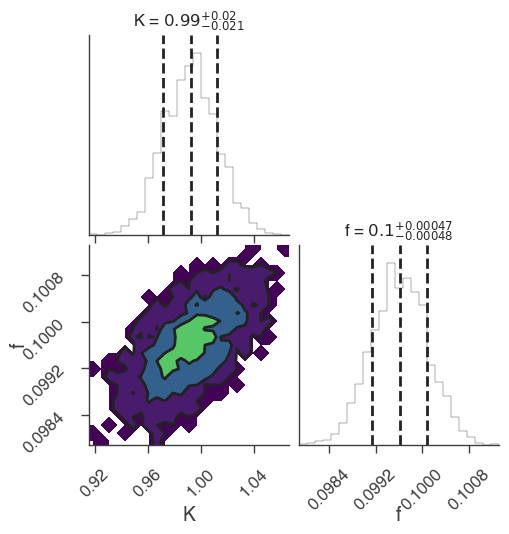

In [7]:
bayes_analysis.set_sampler("dynesty_nested")
bayes_analysis.sampler.setup(n_live_points=400)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

22:22:12 INFO      sampler set to dynesty_dynamic                                          ]8;id=528485;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=75406;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

0it [00:00, ?it/s]

1it [00:00,  7.98it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1 | eff(%):  0.200 | loglstar:   -inf < -12859.297 <    inf | logz: -12866.207 +/-  0.117 | dlogz:    inf >  0.010]

83it [00:00, 439.59it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 88 | eff(%): 14.116 | loglstar:   -inf < -6455.763 <    inf | logz: -6462.836 +/-  0.119 | dlogz: 6443.410 >  0.010]

160it [00:00, 574.44it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 189 | eff(%): 23.222 | loglstar:   -inf < -5236.154 <    inf | logz: -5243.105 +/-  0.114 | dlogz: 5185.999 >  0.010]

246it [00:00, 682.32it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 310 | eff(%): 30.370 | loglstar:   -inf < -4246.169 <    inf | logz: -4253.569 +/-  0.122 | dlogz: 4212.363 >  0.010]

317it [00:00, 658.59it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 434 | eff(%): 33.940 | loglstar:   -inf < -3572.295 <    inf | logz: -3579.837 +/-  0.123 | dlogz: 3531.510 >  0.010]

385it [00:00, 516.74it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 562 | eff(%): 36.252 | loglstar:   -inf < -3053.348 <    inf | logz: -3061.025 +/-  0.124 | dlogz: 3039.841 >  0.010]

442it [00:00, 440.46it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 720 | eff(%): 36.230 | loglstar:   -inf < -2720.038 <    inf | logz: -2727.816 +/-  0.124 | dlogz: 2699.312 >  0.010]

491it [00:01, 451.09it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 839 | eff(%): 36.669 | loglstar:   -inf < -2476.567 <    inf | logz: -2484.046 +/-  0.117 | dlogz: 2452.032 >  0.010]

540it [00:01, 452.81it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 994 | eff(%): 36.145 | loglstar:   -inf < -2261.868 <    inf | logz: -2269.811 +/-  0.125 | dlogz: 2254.335 >  0.010]

603it [00:01, 493.26it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 1198 | eff(%): 35.512 | loglstar:   -inf < -2053.126 <    inf | logz: -2060.690 +/-  0.119 | dlogz: 2042.812 >  0.010]

655it [00:01, 498.53it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 1397 | eff(%): 34.528 | loglstar:   -inf < -1851.158 <    inf | logz: -1857.933 +/-  0.115 | dlogz: 1838.955 >  0.010] 

707it [00:01, 477.23it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 1639 | eff(%): 33.053 | loglstar:   -inf < -1738.395 <    inf | logz: -1746.408 +/-  0.120 | dlogz: 1728.861 >  0.010]

756it [00:01, 470.15it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 1855 | eff(%): 32.102 | loglstar:   -inf < -1606.070 <    inf | logz: -1614.464 +/-  0.129 | dlogz: 1599.507 >  0.010]

805it [00:01, 475.56it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 2057 | eff(%): 31.482 | loglstar:   -inf < -1473.820 <    inf | logz: -1481.904 +/-  0.122 | dlogz: 1463.994 >  0.010]

854it [00:01, 419.06it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 2349 | eff(%): 29.975 | loglstar:   -inf < -1362.025 <    inf | logz: -1370.625 +/-  0.131 | dlogz: 1356.012 >  0.010]

898it [00:02, 326.23it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 2686 | eff(%): 28.186 | loglstar:   -inf < -1301.741 <    inf | logz: -1309.418 +/-  0.117 | dlogz: 1290.450 >  0.010]

935it [00:02, 334.88it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 2907 | eff(%): 27.443 | loglstar:   -inf < -1244.144 <    inf | logz: -1252.715 +/-  0.127 | dlogz: 1235.225 >  0.010]

972it [00:02, 340.49it/s, batch: 0 | bound: 0 | nc: 26 | ncall: 3141 | eff(%): 26.696 | loglstar:   -inf < -1186.945 <    inf | logz: -1195.029 +/-  0.120 | dlogz: 1176.102 >  0.010]

1009it [00:02, 299.37it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 3477 | eff(%): 25.371 | loglstar:   -inf < -1159.209 <    inf | logz: -1166.666 +/-  0.113 | dlogz: 1147.280 >  0.010]

1042it [00:02, 285.36it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 3733 | eff(%): 24.616 | loglstar:   -inf < -1126.379 <    inf | logz: -1134.766 +/-  0.125 | dlogz: 1121.681 >  0.010] 

1073it [00:02, 267.76it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 4046 | eff(%): 23.603 | loglstar:   -inf < -1102.449 <    inf | logz: -1110.854 +/-  0.123 | dlogz: 1097.405 >  0.010]

1103it [00:02, 274.76it/s, batch: 0 | bound: 0 | nc: 11 | ncall: 4265 | eff(%): 23.148 | loglstar:   -inf < -1085.305 <    inf | logz: -1092.463 +/-  0.116 | dlogz: 1082.833 >  0.010]

1132it [00:02, 211.04it/s, batch: 0 | bound: 0 | nc: 30 | ncall: 4596 | eff(%): 22.214 | loglstar:   -inf < -1066.149 <    inf | logz: -1074.040 +/-  0.122 | dlogz: 1064.618 >  0.010]

1156it [00:03, 195.66it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 4873 | eff(%): 21.515 | loglstar:   -inf < -1044.392 <    inf | logz: -1052.248 +/-  0.118 | dlogz: 1042.779 >  0.010] 

1178it [00:03, 149.85it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 5208 | eff(%): 20.638 | loglstar:   -inf < -1024.191 <    inf | logz: -1032.650 +/-  0.125 | dlogz: 1023.663 >  0.010]

1196it [00:03, 123.54it/s, batch: 0 | bound: 0 | nc: 18 | ncall: 5387 | eff(%): 20.316 | loglstar:   -inf < -1014.282 <    inf | logz: -1022.422 +/-  0.122 | dlogz: 1012.951 >  0.010]

1211it [00:03, 123.31it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 5561 | eff(%): 19.980 | loglstar:   -inf < -1003.321 <    inf | logz: -1011.194 +/-  0.122 | dlogz: 1001.645 >  0.010] 

1225it [00:03, 123.29it/s, batch: 0 | bound: 0 | nc: 27 | ncall: 5800 | eff(%): 19.444 | loglstar:   -inf < -996.707 <    inf | logz: -1004.183 +/-  0.118 | dlogz: 994.331 >  0.010] 

1239it [00:04, 92.50it/s, batch: 0 | bound: 0 | nc: 26 | ncall: 5944 | eff(%): 19.227 | loglstar:   -inf < -982.343 <    inf | logz: -990.341 +/-  0.123 | dlogz: 980.729 >  0.010]  

1261it [00:04, 115.43it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 6173 | eff(%): 18.897 | loglstar:   -inf < -970.139 <    inf | logz: -977.995 +/-  0.121 | dlogz: 968.254 >  0.010]

1276it [00:04, 121.33it/s, batch: 0 | bound: 0 | nc: 1 | ncall: 6403 | eff(%): 18.485 | loglstar:   -inf < -918.287 <    inf | logz: -927.706 +/-  0.136 | dlogz: 921.378 >  0.010]

1291it [00:04, 100.06it/s, batch: 0 | bound: 0 | nc: 14 | ncall: 6671 | eff(%): 18.003 | loglstar:   -inf < -874.773 <    inf | logz: -884.237 +/-  0.137 | dlogz: 878.354 >  0.010]

1308it [00:04, 112.81it/s, batch: 0 | bound: 0 | nc: 18 | ncall: 6866 | eff(%): 17.757 | loglstar:   -inf < -833.111 <    inf | logz: -842.632 +/-  0.138 | dlogz: 840.962 >  0.010]

1322it [00:04, 112.07it/s, batch: 0 | bound: 0 | nc: 19 | ncall: 7044 | eff(%): 17.524 | loglstar:   -inf < -798.950 <    inf | logz: -807.980 +/-  0.128 | dlogz: 798.858 >  0.010]

1335it [00:04, 116.08it/s, batch: 0 | bound: 0 | nc: 9 | ncall: 7260 | eff(%): 17.204 | loglstar:   -inf < -766.595 <    inf | logz: -775.317 +/-  0.125 | dlogz: 765.675 >  0.010] 

1351it [00:05, 124.77it/s, batch: 0 | bound: 0 | nc: 32 | ncall: 7513 | eff(%): 16.860 | loglstar:   -inf < -731.297 <    inf | logz: -740.629 +/-  0.132 | dlogz: 732.133 >  0.010]

1365it [00:05, 125.98it/s, batch: 0 | bound: 0 | nc: 15 | ncall: 7761 | eff(%): 16.523 | loglstar:   -inf < -706.026 <    inf | logz: -715.039 +/-  0.131 | dlogz: 705.995 >  0.010]

1384it [00:05, 129.97it/s, batch: 0 | bound: 0 | nc: 128 | ncall: 8085 | eff(%): 16.121 | loglstar:   -inf < -681.283 <    inf | logz: -689.719 +/-  0.126 | dlogz: 679.937 >  0.010]

1399it [00:05, 129.49it/s, batch: 0 | bound: 0 | nc: 108 | ncall: 8357 | eff(%): 15.795 | loglstar:   -inf < -650.488 <    inf | logz: -660.189 +/-  0.139 | dlogz: 656.017 >  0.010]

1414it [00:05, 128.35it/s, batch: 0 | bound: 0 | nc: 79 | ncall: 8623 | eff(%): 15.499 | loglstar:   -inf < -628.047 <    inf | logz: -636.793 +/-  0.127 | dlogz: 627.122 >  0.010] 

1428it [00:05, 128.39it/s, batch: 0 | bound: 0 | nc: 83 | ncall: 8892 | eff(%): 15.204 | loglstar:   -inf < -609.450 <    inf | logz: -618.755 +/-  0.130 | dlogz: 609.428 >  0.010]

1441it [00:05, 124.53it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 9160 | eff(%): 14.917 | loglstar:   -inf < -580.111 <    inf | logz: -589.646 +/-  0.135 | dlogz: 581.207 >  0.010]

1454it [00:05, 115.48it/s, batch: 0 | bound: 0 | nc: 4 | ncall: 9504 | eff(%): 14.534 | loglstar:   -inf < -547.296 <    inf | logz: -557.108 +/-  0.140 | dlogz: 554.847 >  0.010] 

1470it [00:05, 125.98it/s, batch: 0 | bound: 0 | nc: 10 | ncall: 9790 | eff(%): 14.286 | loglstar:   -inf < -520.068 <    inf | logz: -528.996 +/-  0.130 | dlogz: 519.364 >  0.010]

1483it [00:06, 126.42it/s, batch: 0 | bound: 0 | nc: 39 | ncall: 10012 | eff(%): 14.108 | loglstar:   -inf < -507.516 <    inf | logz: -516.938 +/-  0.131 | dlogz: 507.615 >  0.010]

1498it [00:06, 131.91it/s, batch: 0 | bound: 0 | nc: 70 | ncall: 10296 | eff(%): 13.876 | loglstar:   -inf < -483.822 <    inf | logz: -493.652 +/-  0.138 | dlogz: 486.054 >  0.010]

1512it [00:06, 128.66it/s, batch: 0 | bound: 0 | nc: 49 | ncall: 10593 | eff(%): 13.630 | loglstar:   -inf < -467.112 <    inf | logz: -476.299 +/-  0.132 | dlogz: 466.821 >  0.010]

1525it [00:06, 111.75it/s, batch: 0 | bound: 0 | nc: 39 | ncall: 10911 | eff(%): 13.364 | loglstar:   -inf < -449.653 <    inf | logz: -458.765 +/-  0.129 | dlogz: 448.848 >  0.010]

1537it [00:06, 111.73it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 11158 | eff(%): 13.184 | loglstar:   -inf < -435.113 <    inf | logz: -444.657 +/-  0.131 | dlogz: 435.123 >  0.010] 

1552it [00:06, 118.11it/s, batch: 0 | bound: 0 | nc: 47 | ncall: 11477 | eff(%): 12.958 | loglstar:   -inf < -420.327 <    inf | logz: -429.215 +/-  0.128 | dlogz: 419.150 >  0.010]

1565it [00:06, 120.04it/s, batch: 0 | bound: 0 | nc: 8 | ncall: 11686 | eff(%): 12.843 | loglstar:   -inf < -411.824 <    inf | logz: -420.711 +/-  0.127 | dlogz: 410.503 >  0.010] 

1578it [00:06, 92.77it/s, batch: 0 | bound: 0 | nc: 21 | ncall: 12035 | eff(%): 12.589 | loglstar:   -inf < -407.056 <    inf | logz: -415.538 +/-  0.122 | dlogz: 405.017 >  0.010]

1589it [00:07, 84.65it/s, batch: 0 | bound: 0 | nc: 12 | ncall: 12295 | eff(%): 12.419 | loglstar:   -inf < -398.371 <    inf | logz: -407.157 +/-  0.127 | dlogz: 396.813 >  0.010]

1599it [00:07, 83.97it/s, batch: 0 | bound: 0 | nc: 6 | ncall: 12503 | eff(%): 12.297 | loglstar:   -inf < -391.218 <    inf | logz: -399.866 +/-  0.127 | dlogz: 389.522 >  0.010] 

1608it [00:07, 79.49it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 12753 | eff(%): 12.133 | loglstar:   -inf < -382.333 <    inf | logz: -391.077 +/-  0.129 | dlogz: 380.812 >  0.010]

1617it [00:07, 67.97it/s, batch: 0 | bound: 0 | nc: 33 | ncall: 13065 | eff(%): 11.920 | loglstar:   -inf < -374.076 <    inf | logz: -383.739 +/-  0.131 | dlogz: 373.905 >  0.010]

1625it [00:07, 60.80it/s, batch: 0 | bound: 0 | nc: 26 | ncall: 13270 | eff(%): 11.801 | loglstar:   -inf < -370.047 <    inf | logz: -378.588 +/-  0.125 | dlogz: 367.989 >  0.010]

1632it [00:07, 61.22it/s, batch: 0 | bound: 0 | nc: 2 | ncall: 13465 | eff(%): 11.686 | loglstar:   -inf < -366.876 <    inf | logz: -375.724 +/-  0.124 | dlogz: 365.189 >  0.010] 

1640it [00:07, 64.38it/s, batch: 0 | bound: 0 | nc: 38 | ncall: 13667 | eff(%): 11.576 | loglstar:   -inf < -361.239 <    inf | logz: -370.183 +/-  0.128 | dlogz: 360.215 >  0.010]

1649it [00:08, 69.31it/s, batch: 0 | bound: 0 | nc: 41 | ncall: 13826 | eff(%): 11.511 | loglstar:   -inf < -356.974 <    inf | logz: -365.152 +/-  0.123 | dlogz: 354.770 >  0.010]

1660it [00:08, 79.63it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 13943 | eff(%): 11.493 | loglstar:   -inf < -348.406 <    inf | logz: -356.753 +/-  0.126 | dlogz: 346.431 >  0.010] 

1669it [00:08, 78.59it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 14145 | eff(%): 11.396 | loglstar:   -inf < -343.177 <    inf | logz: -352.731 +/-  0.129 | dlogz: 342.918 >  0.010]

1678it [00:08, 65.65it/s, batch: 0 | bound: 0 | nc: 101 | ncall: 14581 | eff(%): 11.127 | loglstar:   -inf < -338.553 <    inf | logz: -347.961 +/-  0.128 | dlogz: 337.995 >  0.010]

1686it [00:08, 66.54it/s, batch: 0 | bound: 0 | nc: 3 | ncall: 14913 | eff(%): 10.939 | loglstar:   -inf < -333.163 <    inf | logz: -342.558 +/-  0.128 | dlogz: 332.533 >  0.010]  

1694it [00:08, 61.49it/s, batch: 0 | bound: 0 | nc: 112 | ncall: 15166 | eff(%): 10.813 | loglstar:   -inf < -328.783 <    inf | logz: -337.260 +/-  0.126 | dlogz: 326.900 >  0.010]

1704it [00:08, 69.10it/s, batch: 0 | bound: 0 | nc: 27 | ncall: 15414 | eff(%): 10.708 | loglstar:   -inf < -320.891 <    inf | logz: -330.448 +/-  0.130 | dlogz: 320.563 >  0.010] 

1712it [00:09, 64.50it/s, batch: 0 | bound: 0 | nc: 34 | ncall: 15764 | eff(%): 10.526 | loglstar:   -inf < -317.641 <    inf | logz: -326.635 +/-  0.125 | dlogz: 316.297 >  0.010]

1719it [00:09, 63.99it/s, batch: 0 | bound: 0 | nc: 37 | ncall: 16013 | eff(%): 10.410 | loglstar:   -inf < -311.742 <    inf | logz: -320.077 +/-  0.127 | dlogz: 309.587 >  0.010]

1726it [00:09, 64.44it/s, batch: 0 | bound: 0 | nc: 5 | ncall: 16277 | eff(%): 10.288 | loglstar:   -inf < -309.890 <    inf | logz: -318.061 +/-  0.122 | dlogz: 307.494 >  0.010] 

1733it [00:09, 62.36it/s, batch: 0 | bound: 0 | nc: 34 | ncall: 16507 | eff(%): 10.190 | loglstar:   -inf < -304.301 <    inf | logz: -313.429 +/-  0.129 | dlogz: 303.202 >  0.010]

1740it [00:09, 59.22it/s, batch: 0 | bound: 0 | nc: 7 | ncall: 16742 | eff(%): 10.092 | loglstar:   -inf < -301.784 <    inf | logz: -310.475 +/-  0.125 | dlogz: 300.014 >  0.010] 

1747it [00:10, 23.24it/s, batch: 0 | bound: 1 | nc: 4 | ncall: 16992 | eff(%):  9.987 | loglstar:   -inf < -297.564 <    inf | logz: -306.693 +/-  0.128 | dlogz: 296.435 >  0.010]

1853it [00:10, 147.80it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17134 | eff(%): 10.508 | loglstar:   -inf < -246.709 <    inf | logz: -255.409 +/-  0.128 | dlogz: 245.437 >  0.010]

1924it [00:10, 228.63it/s, batch: 0 | bound: 1 | nc: 4 | ncall: 17246 | eff(%): 10.842 | loglstar:   -inf < -216.158 <    inf | logz: -225.453 +/-  0.129 | dlogz: 215.424 >  0.010]

1969it [00:10, 257.29it/s, batch: 0 | bound: 1 | nc: 1 | ncall: 17325 | eff(%): 11.046 | loglstar:   -inf < -199.569 <    inf | logz: -208.539 +/-  0.127 | dlogz: 198.329 >  0.010]

2032it [00:10, 327.76it/s, batch: 0 | bound: 1 | nc: 7 | ncall: 17453 | eff(%): 11.318 | loglstar:   -inf < -171.394 <    inf | logz: -180.457 +/-  0.128 | dlogz: 170.109 >  0.010]

2085it [00:10, 371.01it/s, batch: 0 | bound: 1 | nc: 3 | ncall: 17593 | eff(%): 11.524 | loglstar:   -inf < -152.674 <    inf | logz: -161.514 +/-  0.128 | dlogz: 150.973 >  0.010]

2135it [00:11, 206.99it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 17745 | eff(%): 11.702 | loglstar:   -inf < -139.939 <    inf | logz: -148.901 +/-  0.127 | dlogz: 138.264 >  0.010]

2222it [00:11, 304.25it/s, batch: 0 | bound: 2 | nc: 2 | ncall: 17846 | eff(%): 12.112 | loglstar:   -inf < -120.049 <    inf | logz: -128.635 +/-  0.124 | dlogz: 117.726 >  0.010]

2275it [00:11, 278.90it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 17918 | eff(%): 12.352 | loglstar:   -inf < -111.023 <    inf | logz: -119.730 +/-  0.124 | dlogz: 108.724 >  0.010]

2319it [00:11, 296.25it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 17995 | eff(%): 12.539 | loglstar:   -inf < -102.668 <    inf | logz: -111.791 +/-  0.127 | dlogz: 100.744 >  0.010]

2361it [00:11, 284.97it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18070 | eff(%): 12.714 | loglstar:   -inf < -93.744 <    inf | logz: -103.248 +/-  0.130 | dlogz: 92.200 >  0.010]  

2437it [00:11, 376.51it/s, batch: 0 | bound: 2 | nc: 1 | ncall: 18197 | eff(%): 13.034 | loglstar:   -inf < -82.965 <    inf | logz: -92.489 +/-  0.130 | dlogz: 81.254 >  0.010] 

2500it [00:12, 430.04it/s, batch: 0 | bound: 2 | nc: 4 | ncall: 18336 | eff(%): 13.272 | loglstar:   -inf < -73.212 <    inf | logz: -82.644 +/-  0.130 | dlogz: 71.226 >  0.010]

2560it [00:12, 311.85it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 18493 | eff(%): 13.479 | loglstar:   -inf < -66.901 <    inf | logz: -76.034 +/-  0.127 | dlogz: 64.435 >  0.010]

2679it [00:12, 471.34it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 18649 | eff(%): 13.990 | loglstar:   -inf < -55.216 <    inf | logz: -64.453 +/-  0.128 | dlogz: 52.605 >  0.010]

2777it [00:12, 572.65it/s, batch: 0 | bound: 3 | nc: 1 | ncall: 18828 | eff(%): 14.368 | loglstar:   -inf < -46.472 <    inf | logz: -55.414 +/-  0.128 | dlogz: 43.330 >  0.010]

2852it [00:12, 573.46it/s, batch: 0 | bound: 3 | nc: 6 | ncall: 18982 | eff(%): 14.639 | loglstar:   -inf < -40.534 <    inf | logz: -49.652 +/-  0.129 | dlogz: 37.421 >  0.010]

2922it [00:12, 533.35it/s, batch: 0 | bound: 3 | nc: 2 | ncall: 19153 | eff(%): 14.868 | loglstar:   -inf < -34.559 <    inf | logz: -44.007 +/-  0.130 | dlogz: 31.650 >  0.010]

2984it [00:13, 292.27it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19283 | eff(%): 15.084 | loglstar:   -inf < -31.999 <    inf | logz: -41.105 +/-  0.127 | dlogz: 28.596 >  0.010]

3075it [00:13, 377.51it/s, batch: 0 | bound: 4 | nc: 1 | ncall: 19396 | eff(%): 15.455 | loglstar:   -inf < -27.927 <    inf | logz: -37.027 +/-  0.128 | dlogz: 24.328 >  0.010]

3162it [00:13, 458.66it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 19527 | eff(%): 15.789 | loglstar:   -inf < -24.734 <    inf | logz: -33.828 +/-  0.127 | dlogz: 20.948 >  0.010]

3228it [00:13, 474.24it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 19660 | eff(%): 16.012 | loglstar:   -inf < -21.815 <    inf | logz: -31.318 +/-  0.129 | dlogz: 18.316 >  0.010]

3290it [00:13, 432.65it/s, batch: 0 | bound: 4 | nc: 2 | ncall: 19810 | eff(%): 16.199 | loglstar:   -inf < -19.454 <    inf | logz: -28.920 +/-  0.130 | dlogz: 15.789 >  0.010]

3352it [00:14, 464.40it/s, batch: 0 | bound: 4 | nc: 15 | ncall: 19965 | eff(%): 16.379 | loglstar:   -inf < -18.163 <    inf | logz: -27.219 +/-  0.128 | dlogz: 13.952 >  0.010]

3407it [00:14, 275.55it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20069 | eff(%): 16.564 | loglstar:   -inf < -16.962 <    inf | logz: -26.024 +/-  0.128 | dlogz: 12.646 >  0.010] 

3463it [00:14, 319.34it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20146 | eff(%): 16.773 | loglstar:   -inf < -15.876 <    inf | logz: -24.952 +/-  0.128 | dlogz: 11.460 >  0.010]

3533it [00:14, 387.60it/s, batch: 0 | bound: 5 | nc: 1 | ncall: 20249 | eff(%): 17.027 | loglstar:   -inf < -14.569 <    inf | logz: -23.720 +/-  0.128 | dlogz: 10.087 >  0.010]

3595it [00:14, 434.57it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 20367 | eff(%): 17.228 | loglstar:   -inf < -13.631 <    inf | logz: -22.753 +/-  0.128 | dlogz:  8.996 >  0.010]

3651it [00:14, 457.12it/s, batch: 0 | bound: 5 | nc: 3 | ncall: 20496 | eff(%): 17.389 | loglstar:   -inf < -12.860 <    inf | logz: -22.021 +/-  0.128 | dlogz:  8.151 >  0.010]

3706it [00:15, 366.25it/s, batch: 0 | bound: 5 | nc: 2 | ncall: 20623 | eff(%): 17.545 | loglstar:   -inf < -12.297 <    inf | logz: -21.395 +/-  0.127 | dlogz:  7.423 >  0.010]

3759it [00:15, 399.86it/s, batch: 0 | bound: 5 | nc: 4 | ncall: 20739 | eff(%): 17.699 | loglstar:   -inf < -11.627 <    inf | logz: -20.802 +/-  0.128 | dlogz:  6.725 >  0.010]

3807it [00:15, 164.12it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 20800 | eff(%): 17.873 | loglstar:   -inf < -11.231 <    inf | logz: -20.335 +/-  0.128 | dlogz:  6.161 >  0.010]

3843it [00:16, 184.70it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 20842 | eff(%): 18.007 | loglstar:   -inf < -10.970 <    inf | logz: -20.028 +/-  0.127 | dlogz:  5.782 >  0.010]

3884it [00:16, 213.06it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 20889 | eff(%): 18.159 | loglstar:   -inf < -10.560 <    inf | logz: -19.708 +/-  0.127 | dlogz:  5.387 >  0.010]

3924it [00:16, 243.47it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 20939 | eff(%): 18.303 | loglstar:   -inf < -10.245 <    inf | logz: -19.401 +/-  0.127 | dlogz:  5.001 >  0.010]

3961it [00:16, 259.67it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 20999 | eff(%): 18.424 | loglstar:   -inf < -10.003 <    inf | logz: -19.136 +/-  0.127 | dlogz:  4.664 >  0.010]

3997it [00:16, 273.38it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21063 | eff(%): 18.536 | loglstar:   -inf < -9.777 <    inf | logz: -18.904 +/-  0.127 | dlogz:  4.363 >  0.010] 

4042it [00:16, 312.80it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21141 | eff(%): 18.678 | loglstar:   -inf < -9.456 <    inf | logz: -18.619 +/-  0.128 | dlogz:  3.994 >  0.010]

4080it [00:16, 299.80it/s, batch: 0 | bound: 6 | nc: 2 | ncall: 21212 | eff(%): 18.791 | loglstar:   -inf < -9.335 <    inf | logz: -18.411 +/-  0.128 | dlogz:  3.716 >  0.010]

4115it [00:16, 298.39it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21288 | eff(%): 18.887 | loglstar:   -inf < -9.172 <    inf | logz: -18.241 +/-  0.127 | dlogz:  3.482 >  0.010]

4148it [00:16, 305.41it/s, batch: 0 | bound: 6 | nc: 4 | ncall: 21349 | eff(%): 18.985 | loglstar:   -inf < -9.031 <    inf | logz: -18.093 +/-  0.127 | dlogz:  3.275 >  0.010]

4181it [00:17, 288.22it/s, batch: 0 | bound: 6 | nc: 3 | ncall: 21410 | eff(%): 19.083 | loglstar:   -inf < -8.885 <    inf | logz: -17.955 +/-  0.127 | dlogz:  3.079 >  0.010]

4212it [00:17, 293.65it/s, batch: 0 | bound: 6 | nc: 1 | ncall: 21478 | eff(%): 19.165 | loglstar:   -inf < -8.764 <    inf | logz: -17.833 +/-  0.127 | dlogz:  2.904 >  0.010]

4243it [00:17, 129.57it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21526 | eff(%): 19.264 | loglstar:   -inf < -8.661 <    inf | logz: -17.718 +/-  0.127 | dlogz:  2.738 >  0.010]

4367it [00:17, 287.71it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 21671 | eff(%): 19.697 | loglstar:   -inf < -8.248 <    inf | logz: -17.329 +/-  0.127 | dlogz:  2.156 >  0.010]

4470it [00:17, 412.90it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 21826 | eff(%): 20.021 | loglstar:   -inf < -7.929 <    inf | logz: -17.055 +/-  0.127 | dlogz:  1.749 >  0.010]

4560it [00:18, 507.48it/s, batch: 0 | bound: 7 | nc: 1 | ncall: 21983 | eff(%): 20.282 | loglstar:   -inf < -7.690 <    inf | logz: -16.850 +/-  0.127 | dlogz:  1.442 >  0.010]

4640it [00:18, 569.80it/s, batch: 0 | bound: 7 | nc: 2 | ncall: 22154 | eff(%): 20.482 | loglstar:   -inf < -7.510 <    inf | logz: -16.693 +/-  0.127 | dlogz:  1.210 >  0.010]

4716it [00:18, 327.66it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22296 | eff(%): 20.688 | loglstar:   -inf < -7.391 <    inf | logz: -16.565 +/-  0.127 | dlogz:  1.024 >  0.010]

4837it [00:18, 454.38it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22463 | eff(%): 21.064 | loglstar:   -inf < -7.207 <    inf | logz: -16.396 +/-  0.127 | dlogz:  0.781 >  0.010]

4923it [00:18, 516.88it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22604 | eff(%): 21.308 | loglstar:   -inf < -7.104 <    inf | logz: -16.298 +/-  0.127 | dlogz:  0.644 >  0.010]

4998it [00:19, 520.12it/s, batch: 0 | bound: 8 | nc: 1 | ncall: 22748 | eff(%): 21.499 | loglstar:   -inf < -7.015 <    inf | logz: -16.225 +/-  0.128 | dlogz:  0.544 >  0.010]

5067it [00:19, 518.80it/s, batch: 0 | bound: 8 | nc: 2 | ncall: 22893 | eff(%): 21.660 | loglstar:   -inf < -6.957 <    inf | logz: -16.166 +/-  0.128 | dlogz:  0.466 >  0.010]

5131it [00:19, 280.82it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23029 | eff(%): 21.807 | loglstar:   -inf < -6.904 <    inf | logz: -16.118 +/-  0.128 | dlogz:  0.404 >  0.010]

5203it [00:19, 340.66it/s, batch: 0 | bound: 9 | nc: 3 | ncall: 23122 | eff(%): 22.026 | loglstar:   -inf < -6.860 <    inf | logz: -16.070 +/-  0.128 | dlogz:  0.344 >  0.010]

5262it [00:19, 381.52it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 23204 | eff(%): 22.199 | loglstar:   -inf < -6.830 <    inf | logz: -16.036 +/-  0.128 | dlogz:  0.302 >  0.010]

5337it [00:19, 451.27it/s, batch: 0 | bound: 9 | nc: 2 | ncall: 23324 | eff(%): 22.402 | loglstar:   -inf < -6.784 <    inf | logz: -15.999 +/-  0.128 | dlogz:  0.257 >  0.010]

5400it [00:20, 489.19it/s, batch: 0 | bound: 9 | nc: 3 | ncall: 23451 | eff(%): 22.546 | loglstar:   -inf < -6.759 <    inf | logz: -15.971 +/-  0.128 | dlogz:  0.224 >  0.010]

5469it [00:20, 528.62it/s, batch: 0 | bound: 9 | nc: 4 | ncall: 23592 | eff(%): 22.700 | loglstar:   -inf < -6.735 <    inf | logz: -15.944 +/-  0.128 | dlogz:  0.193 >  0.010]

5532it [00:20, 513.18it/s, batch: 0 | bound: 9 | nc: 1 | ncall: 23748 | eff(%): 22.814 | loglstar:   -inf < -6.713 <    inf | logz: -15.923 +/-  0.128 | dlogz:  0.169 >  0.010]

5591it [00:20, 232.44it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 23824 | eff(%): 22.986 | loglstar:   -inf < -6.696 <    inf | logz: -15.905 +/-  0.128 | dlogz:  0.149 >  0.010]

5686it [00:21, 328.19it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 23948 | eff(%): 23.258 | loglstar:   -inf < -6.668 <    inf | logz: -15.881 +/-  0.128 | dlogz:  0.122 >  0.010]

5752it [00:21, 380.26it/s, batch: 0 | bound: 10 | nc: 1 | ncall: 24056 | eff(%): 23.424 | loglstar:   -inf < -6.654 <    inf | logz: -15.867 +/-  0.128 | dlogz:  0.106 >  0.010]

5819it [00:21, 433.91it/s, batch: 0 | bound: 10 | nc: 3 | ncall: 24183 | eff(%): 23.575 | loglstar:   -inf < -6.643 <    inf | logz: -15.854 +/-  0.128 | dlogz:  0.092 >  0.010]

5882it [00:21, 461.22it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 24338 | eff(%): 23.681 | loglstar:   -inf < -6.634 <    inf | logz: -15.843 +/-  0.128 | dlogz:  0.081 >  0.010]

5943it [00:21, 353.80it/s, batch: 0 | bound: 10 | nc: 2 | ncall: 24496 | eff(%): 23.776 | loglstar:   -inf < -6.627 <    inf | logz: -15.834 +/-  0.128 | dlogz:  0.071 >  0.010]

5992it [00:22, 234.97it/s, batch: 0 | bound: 11 | nc: 1 | ncall: 24566 | eff(%): 23.905 | loglstar:   -inf < -6.622 <    inf | logz: -15.828 +/-  0.128 | dlogz:  0.064 >  0.010]

6108it [00:22, 365.90it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 24717 | eff(%): 24.222 | loglstar:   -inf < -6.609 <    inf | logz: -15.815 +/-  0.128 | dlogz:  0.051 >  0.010]

6213it [00:22, 480.33it/s, batch: 0 | bound: 11 | nc: 3 | ncall: 24882 | eff(%): 24.478 | loglstar:   -inf < -6.601 <    inf | logz: -15.805 +/-  0.128 | dlogz:  0.041 >  0.010]

6302it [00:22, 558.92it/s, batch: 0 | bound: 11 | nc: 2 | ncall: 25070 | eff(%): 24.646 | loglstar:   -inf < -6.596 <    inf | logz: -15.799 +/-  0.128 | dlogz:  0.034 >  0.010]

6381it [00:22, 346.59it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25274 | eff(%): 24.758 | loglstar:   -inf < -6.592 <    inf | logz: -15.794 +/-  0.128 | dlogz:  0.029 >  0.010]

6493it [00:22, 462.07it/s, batch: 0 | bound: 12 | nc: 1 | ncall: 25415 | eff(%): 25.055 | loglstar:   -inf < -6.587 <    inf | logz: -15.788 +/-  0.128 | dlogz:  0.023 >  0.010]

6605it [00:23, 577.50it/s, batch: 0 | bound: 12 | nc: 5 | ncall: 25571 | eff(%): 25.335 | loglstar:   -inf < -6.583 <    inf | logz: -15.783 +/-  0.128 | dlogz:  0.019 >  0.010]

6706it [00:23, 663.38it/s, batch: 0 | bound: 12 | nc: 6 | ncall: 25760 | eff(%): 25.537 | loglstar:   -inf < -6.580 <    inf | logz: -15.780 +/-  0.128 | dlogz:  0.015 >  0.010]

6797it [00:23, 687.84it/s, batch: 0 | bound: 12 | nc: 9 | ncall: 25976 | eff(%): 25.672 | loglstar:   -inf < -6.577 <    inf | logz: -15.778 +/-  0.128 | dlogz:  0.013 >  0.010]

6884it [00:23, 488.29it/s, batch: 0 | bound: 13 | nc: 2 | ncall: 26099 | eff(%): 25.881 | loglstar:   -inf < -6.576 <    inf | logz: -15.776 +/-  0.128 | dlogz:  0.011 >  0.010]

7207it [00:23, 987.94it/s, batch: 0 | bound: 13 | nc: 1 | ncall: 26433 | eff(%): 27.055 | loglstar:   -inf < -6.570 <    inf | logz: -15.769 +/-  0.128 | dlogz:  0.004 >  0.010]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



7412it [00:24, 359.36it/s, batch: 1 | bound: 0 | nc: 1 | ncall: 26638 | eff(%): 27.825 | loglstar: -8.400 < -6.779 < -7.024 | logz: -15.765 +/-  0.131 | stop:  1.368]           

7519it [00:25, 399.11it/s, batch: 1 | bound: 2 | nc: 3 | ncall: 26771 | eff(%): 27.537 | loglstar: -8.400 < -8.050 < -7.024 | logz: -15.765 +/-  0.131 | stop:  1.368]

7634it [00:25, 473.61it/s, batch: 1 | bound: 2 | nc: 1 | ncall: 26941 | eff(%): 27.785 | loglstar: -8.400 < -7.729 < -7.024 | logz: -15.765 +/-  0.131 | stop:  1.368]

7735it [00:25, 522.37it/s, batch: 1 | bound: 2 | nc: 2 | ncall: 27129 | eff(%): 27.962 | loglstar: -8.400 < -7.522 < -7.024 | logz: -15.765 +/-  0.131 | stop:  1.368]

7830it [00:25, 559.03it/s, batch: 1 | bound: 2 | nc: 3 | ncall: 27338 | eff(%): 28.093 | loglstar: -8.400 < -7.352 < -7.024 | logz: -15.765 +/-  0.131 | stop:  1.368]

7918it [00:25, 411.61it/s, batch: 1 | bound: 3 | nc: 2 | ncall: 27466 | eff(%): 28.279 | loglstar: -8.400 < -7.213 < -7.024 | logz: -15.765 +/-  0.131 | stop:  1.368]

8048it [00:25, 534.00it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27630 | eff(%): 28.575 | loglstar: -8.400 < -7.054 < -7.024 | logz: -15.765 +/-  0.131 | stop:  1.368]

8175it [00:26, 620.56it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 27790 | eff(%): 28.960 | loglstar: -8.400 < -6.937 < -7.024 | logz: -15.765 +/-  0.131 | stop:  1.368]

8550it [00:26, 1190.33it/s, batch: 1 | bound: 3 | nc: 2 | ncall: 28190 | eff(%): 30.288 | loglstar: -8.400 < -6.598 < -7.024 | logz: -15.765 +/-  0.131 | stop:  1.368]


WARNING DeprecationWarning: This an old stopping function that will be removed in future releases



8585it [00:26, 318.98it/s, batch: 1 | bound: 3 | nc: 1 | ncall: 28229 | eff(%): 30.412 | loglstar: -8.400 < -6.568 < -7.024 | logz: -15.765 +/-  0.131 | stop:  0.990] 

22:22:40 INFO      fit restored to maximum of posterior                                         ]8;id=550685;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=680503;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=112731;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=747362;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.93 -0.21 +0.19) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 +/- 0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.559471
total,-6.559471


Values of statistical measures:

,statistical measures
AIC,17.824825
BIC,19.110407
DIC,17.245317
PDIC,2.062337
log(Z),-6.846612


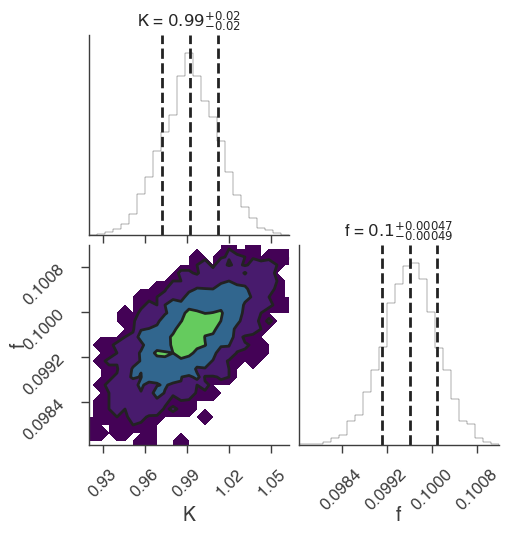

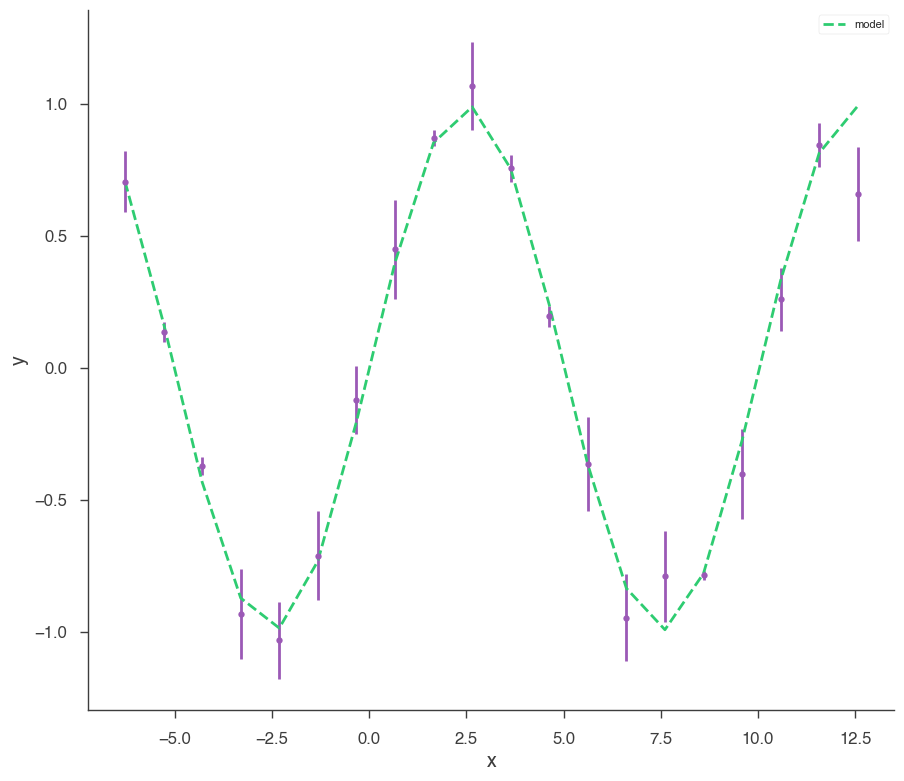

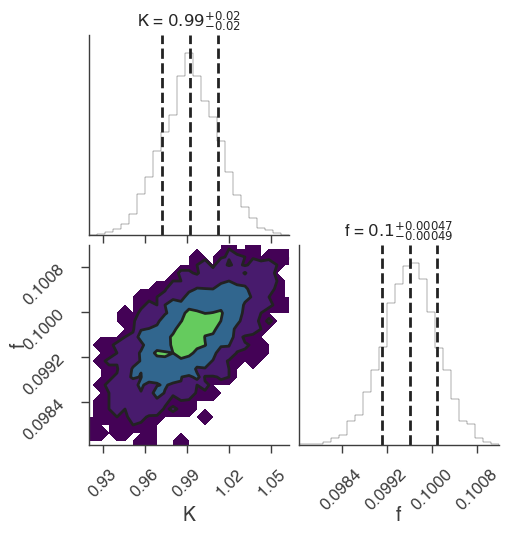

In [8]:
bayes_analysis.set_sampler("dynesty_dynamic")
bayes_analysis.sampler.setup(
    stop_function=dynesty.utils.old_stopping_function, n_effective=None
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## zeus

22:22:41 INFO      sampler set to zeus                                                     ]8;id=483927;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=510021;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

The run method has been deprecated and it will be removed. Please use the new run_mcmc method.


Initialising ensemble of 20 walkers...


Sampling progress :   0%|          | 0/625 [00:00<?, ?it/s]

Sampling progress :   1%|          | 4/625 [00:00<00:19, 31.76it/s]

Sampling progress :   1%|▏         | 8/625 [00:00<00:25, 24.30it/s]

Sampling progress :   2%|▏         | 12/625 [00:00<00:22, 27.62it/s]

Sampling progress :   3%|▎         | 16/625 [00:00<00:20, 29.10it/s]

Sampling progress :   3%|▎         | 19/625 [00:00<00:21, 28.02it/s]

Sampling progress :   4%|▎         | 23/625 [00:00<00:20, 30.02it/s]

Sampling progress :   4%|▍         | 27/625 [00:00<00:19, 30.92it/s]

Sampling progress :   5%|▍         | 31/625 [00:01<00:19, 30.20it/s]

Sampling progress :   6%|▌         | 35/625 [00:01<00:18, 31.35it/s]

Sampling progress :   6%|▌         | 39/625 [00:01<00:18, 32.16it/s]

Sampling progress :   7%|▋         | 43/625 [00:01<00:18, 32.12it/s]

Sampling progress :   8%|▊         | 47/625 [00:01<00:19, 29.68it/s]

Sampling progress :   8%|▊         | 51/625 [00:01<00:23, 23.97it/s]

Sampling progress :   9%|▊         | 54/625 [00:01<00:26, 21.94it/s]

Sampling progress :   9%|▉         | 57/625 [00:02<00:27, 20.65it/s]

Sampling progress :  10%|▉         | 61/625 [00:02<00:23, 23.82it/s]

Sampling progress :  10%|█         | 64/625 [00:02<00:22, 24.88it/s]

Sampling progress :  11%|█         | 68/625 [00:02<00:20, 27.47it/s]

Sampling progress :  12%|█▏        | 72/625 [00:02<00:19, 28.86it/s]

Sampling progress :  12%|█▏        | 76/625 [00:02<00:18, 30.34it/s]

Sampling progress :  13%|█▎        | 80/625 [00:02<00:17, 31.29it/s]

Sampling progress :  13%|█▎        | 84/625 [00:02<00:16, 33.03it/s]

Sampling progress :  14%|█▍        | 88/625 [00:03<00:16, 33.40it/s]

Sampling progress :  15%|█▍        | 92/625 [00:03<00:16, 32.43it/s]

Sampling progress :  15%|█▌        | 96/625 [00:03<00:16, 31.37it/s]

Sampling progress :  16%|█▌        | 100/625 [00:03<00:16, 32.11it/s]

Sampling progress :  17%|█▋        | 104/625 [00:03<00:15, 33.12it/s]

Sampling progress :  17%|█▋        | 108/625 [00:03<00:16, 32.09it/s]

Sampling progress :  18%|█▊        | 112/625 [00:03<00:15, 33.14it/s]

Sampling progress :  19%|█▊        | 116/625 [00:03<00:16, 30.24it/s]

Sampling progress :  19%|█▉        | 120/625 [00:04<00:15, 32.54it/s]

Sampling progress :  20%|█▉        | 124/625 [00:04<00:15, 32.70it/s]

Sampling progress :  20%|██        | 128/625 [00:04<00:14, 33.30it/s]

Sampling progress :  21%|██        | 132/625 [00:04<00:14, 34.02it/s]

Sampling progress :  22%|██▏       | 136/625 [00:04<00:16, 29.16it/s]

Sampling progress :  22%|██▏       | 140/625 [00:04<00:17, 27.79it/s]

Sampling progress :  23%|██▎       | 143/625 [00:04<00:19, 25.05it/s]

Sampling progress :  23%|██▎       | 146/625 [00:05<00:21, 22.32it/s]

Sampling progress :  24%|██▍       | 149/625 [00:05<00:21, 22.57it/s]

Sampling progress :  24%|██▍       | 152/625 [00:05<00:20, 23.24it/s]

Sampling progress :  25%|██▍       | 155/625 [00:05<00:20, 23.33it/s]

Sampling progress :  25%|██▌       | 158/625 [00:05<00:20, 22.61it/s]

Sampling progress :  26%|██▌       | 161/625 [00:05<00:21, 21.82it/s]

Sampling progress :  26%|██▌       | 164/625 [00:05<00:21, 21.25it/s]

Sampling progress :  27%|██▋       | 167/625 [00:06<00:22, 20.27it/s]

Sampling progress :  27%|██▋       | 170/625 [00:06<00:20, 21.90it/s]

Sampling progress :  28%|██▊       | 173/625 [00:06<00:20, 21.53it/s]

Sampling progress :  28%|██▊       | 176/625 [00:06<00:20, 21.72it/s]

Sampling progress :  29%|██▊       | 179/625 [00:06<00:20, 22.28it/s]

Sampling progress :  29%|██▉       | 182/625 [00:06<00:19, 22.22it/s]

Sampling progress :  30%|██▉       | 185/625 [00:06<00:19, 22.31it/s]

Sampling progress :  30%|███       | 188/625 [00:07<00:21, 20.08it/s]

Sampling progress :  31%|███       | 191/625 [00:07<00:23, 18.13it/s]

Sampling progress :  31%|███       | 193/625 [00:07<00:25, 17.10it/s]

Sampling progress :  31%|███       | 195/625 [00:07<00:27, 15.84it/s]

Sampling progress :  32%|███▏      | 197/625 [00:07<00:27, 15.61it/s]

Sampling progress :  32%|███▏      | 199/625 [00:07<00:27, 15.51it/s]

Sampling progress :  32%|███▏      | 201/625 [00:08<00:31, 13.49it/s]

Sampling progress :  32%|███▏      | 203/625 [00:08<00:34, 12.31it/s]

Sampling progress :  33%|███▎      | 205/625 [00:08<00:30, 13.69it/s]

Sampling progress :  33%|███▎      | 207/625 [00:08<00:29, 14.01it/s]

Sampling progress :  34%|███▎      | 210/625 [00:08<00:25, 16.36it/s]

Sampling progress :  34%|███▍      | 214/625 [00:08<00:19, 21.52it/s]

Sampling progress :  35%|███▍      | 217/625 [00:08<00:17, 23.01it/s]

Sampling progress :  35%|███▌      | 220/625 [00:09<00:23, 17.06it/s]

Sampling progress :  36%|███▌      | 223/625 [00:09<00:23, 17.32it/s]

Sampling progress :  36%|███▌      | 226/625 [00:09<00:22, 17.77it/s]

Sampling progress :  36%|███▋      | 228/625 [00:09<00:25, 15.37it/s]

Sampling progress :  37%|███▋      | 230/625 [00:09<00:27, 14.27it/s]

Sampling progress :  37%|███▋      | 232/625 [00:09<00:26, 14.62it/s]

Sampling progress :  37%|███▋      | 234/625 [00:10<00:26, 14.88it/s]

Sampling progress :  38%|███▊      | 236/625 [00:10<00:32, 12.00it/s]

Sampling progress :  38%|███▊      | 238/625 [00:10<00:33, 11.57it/s]

Sampling progress :  38%|███▊      | 240/625 [00:10<00:31, 12.35it/s]

Sampling progress :  39%|███▊      | 242/625 [00:10<00:29, 13.06it/s]

Sampling progress :  39%|███▉      | 244/625 [00:10<00:28, 13.60it/s]

Sampling progress :  39%|███▉      | 246/625 [00:11<00:31, 12.17it/s]

Sampling progress :  40%|███▉      | 248/625 [00:11<00:33, 11.30it/s]

Sampling progress :  40%|████      | 250/625 [00:11<00:32, 11.62it/s]

Sampling progress :  40%|████      | 252/625 [00:11<00:30, 12.37it/s]

Sampling progress :  41%|████      | 254/625 [00:11<00:27, 13.35it/s]

Sampling progress :  41%|████      | 256/625 [00:11<00:25, 14.26it/s]

Sampling progress :  41%|████▏     | 258/625 [00:11<00:23, 15.49it/s]

Sampling progress :  42%|████▏     | 260/625 [00:12<00:25, 14.33it/s]

Sampling progress :  42%|████▏     | 264/625 [00:12<00:18, 19.97it/s]

Sampling progress :  43%|████▎     | 268/625 [00:12<00:15, 23.57it/s]

Sampling progress :  44%|████▎     | 272/625 [00:12<00:17, 20.64it/s]

Sampling progress :  44%|████▍     | 275/625 [00:12<00:16, 20.83it/s]

Sampling progress :  44%|████▍     | 278/625 [00:12<00:15, 22.53it/s]

Sampling progress :  45%|████▍     | 281/625 [00:12<00:16, 20.35it/s]

Sampling progress :  45%|████▌     | 284/625 [00:13<00:16, 20.32it/s]

Sampling progress :  46%|████▌     | 287/625 [00:13<00:18, 18.21it/s]

Sampling progress :  46%|████▌     | 289/625 [00:13<00:21, 15.82it/s]

Sampling progress :  47%|████▋     | 291/625 [00:13<00:22, 14.78it/s]

Sampling progress :  47%|████▋     | 293/625 [00:13<00:21, 15.60it/s]

Sampling progress :  47%|████▋     | 295/625 [00:13<00:21, 15.28it/s]

Sampling progress :  48%|████▊     | 297/625 [00:14<00:21, 14.98it/s]

Sampling progress :  48%|████▊     | 299/625 [00:14<00:24, 13.56it/s]

Sampling progress :  48%|████▊     | 301/625 [00:14<00:24, 13.36it/s]

Sampling progress :  48%|████▊     | 303/625 [00:14<00:23, 13.84it/s]

Sampling progress :  49%|████▉     | 305/625 [00:14<00:22, 14.03it/s]

Sampling progress :  49%|████▉     | 307/625 [00:14<00:23, 13.29it/s]

Sampling progress :  49%|████▉     | 309/625 [00:14<00:21, 14.48it/s]

Sampling progress :  50%|████▉     | 311/625 [00:15<00:21, 14.49it/s]

Sampling progress :  50%|█████     | 313/625 [00:15<00:21, 14.34it/s]

Sampling progress :  50%|█████     | 315/625 [00:15<00:22, 13.86it/s]

Sampling progress :  51%|█████     | 317/625 [00:15<00:22, 13.58it/s]

Sampling progress :  51%|█████     | 319/625 [00:15<00:22, 13.37it/s]

Sampling progress :  51%|█████▏    | 321/625 [00:15<00:23, 13.22it/s]

Sampling progress :  52%|█████▏    | 323/625 [00:15<00:21, 13.95it/s]

Sampling progress :  52%|█████▏    | 325/625 [00:16<00:21, 13.85it/s]

Sampling progress :  52%|█████▏    | 327/625 [00:16<00:21, 14.17it/s]

Sampling progress :  53%|█████▎    | 329/625 [00:16<00:23, 12.53it/s]

Sampling progress :  53%|█████▎    | 331/625 [00:16<00:22, 13.19it/s]

Sampling progress :  53%|█████▎    | 333/625 [00:16<00:21, 13.54it/s]

Sampling progress :  54%|█████▎    | 335/625 [00:16<00:21, 13.79it/s]

Sampling progress :  54%|█████▍    | 337/625 [00:17<00:21, 13.45it/s]

Sampling progress :  54%|█████▍    | 339/625 [00:17<00:21, 13.55it/s]

Sampling progress :  55%|█████▍    | 341/625 [00:17<00:19, 14.33it/s]

Sampling progress :  55%|█████▍    | 343/625 [00:17<00:19, 14.84it/s]

Sampling progress :  55%|█████▌    | 345/625 [00:17<00:17, 15.64it/s]

Sampling progress :  56%|█████▌    | 347/625 [00:17<00:16, 16.45it/s]

Sampling progress :  56%|█████▌    | 350/625 [00:17<00:14, 19.18it/s]

Sampling progress :  56%|█████▋    | 353/625 [00:17<00:12, 21.60it/s]

Sampling progress :  57%|█████▋    | 356/625 [00:18<00:17, 15.48it/s]

Sampling progress :  57%|█████▋    | 358/625 [00:18<00:18, 14.81it/s]

Sampling progress :  58%|█████▊    | 360/625 [00:18<00:17, 15.24it/s]

Sampling progress :  58%|█████▊    | 362/625 [00:18<00:18, 14.23it/s]

Sampling progress :  58%|█████▊    | 364/625 [00:18<00:19, 13.69it/s]

Sampling progress :  59%|█████▊    | 366/625 [00:18<00:18, 13.64it/s]

Sampling progress :  59%|█████▉    | 368/625 [00:19<00:17, 14.28it/s]

Sampling progress :  59%|█████▉    | 370/625 [00:19<00:19, 13.10it/s]

Sampling progress :  60%|█████▉    | 372/625 [00:19<00:18, 13.36it/s]

Sampling progress :  60%|█████▉    | 374/625 [00:19<00:17, 14.69it/s]

Sampling progress :  60%|██████    | 376/625 [00:19<00:17, 14.49it/s]

Sampling progress :  61%|██████    | 380/625 [00:19<00:12, 19.04it/s]

Sampling progress :  61%|██████▏   | 383/625 [00:19<00:11, 21.39it/s]

Sampling progress :  62%|██████▏   | 387/625 [00:19<00:09, 24.97it/s]

Sampling progress :  63%|██████▎   | 391/625 [00:20<00:08, 26.61it/s]

Sampling progress :  63%|██████▎   | 395/625 [00:20<00:08, 28.51it/s]

Sampling progress :  64%|██████▎   | 398/625 [00:20<00:07, 28.83it/s]

Sampling progress :  64%|██████▍   | 402/625 [00:20<00:07, 30.23it/s]

Sampling progress :  65%|██████▍   | 406/625 [00:20<00:06, 31.43it/s]

Sampling progress :  66%|██████▌   | 410/625 [00:20<00:07, 27.33it/s]

Sampling progress :  66%|██████▌   | 414/625 [00:20<00:07, 29.47it/s]

Sampling progress :  67%|██████▋   | 418/625 [00:20<00:06, 29.59it/s]

Sampling progress :  68%|██████▊   | 423/625 [00:21<00:06, 33.07it/s]

Sampling progress :  68%|██████▊   | 427/625 [00:21<00:05, 33.14it/s]

Sampling progress :  69%|██████▉   | 431/625 [00:21<00:05, 32.93it/s]

Sampling progress :  70%|██████▉   | 435/625 [00:21<00:05, 34.18it/s]

Sampling progress :  70%|███████   | 439/625 [00:21<00:05, 33.29it/s]

Sampling progress :  71%|███████   | 443/625 [00:21<00:06, 28.37it/s]

Sampling progress :  71%|███████▏  | 446/625 [00:21<00:07, 25.33it/s]

Sampling progress :  72%|███████▏  | 449/625 [00:22<00:08, 20.60it/s]

Sampling progress :  72%|███████▏  | 452/625 [00:22<00:07, 22.09it/s]

Sampling progress :  73%|███████▎  | 455/625 [00:22<00:09, 17.84it/s]

Sampling progress :  73%|███████▎  | 458/625 [00:22<00:11, 15.05it/s]

Sampling progress :  74%|███████▍  | 461/625 [00:22<00:09, 16.95it/s]

Sampling progress :  74%|███████▍  | 463/625 [00:23<00:11, 13.85it/s]

Sampling progress :  75%|███████▍  | 466/625 [00:23<00:10, 14.88it/s]

Sampling progress :  75%|███████▍  | 468/625 [00:23<00:10, 15.56it/s]

Sampling progress :  75%|███████▌  | 471/625 [00:23<00:08, 17.63it/s]

Sampling progress :  76%|███████▌  | 473/625 [00:23<00:09, 15.97it/s]

Sampling progress :  76%|███████▌  | 475/625 [00:23<00:09, 15.22it/s]

Sampling progress :  76%|███████▋  | 477/625 [00:24<00:10, 14.62it/s]

Sampling progress :  77%|███████▋  | 479/625 [00:24<00:09, 14.93it/s]

Sampling progress :  77%|███████▋  | 483/625 [00:24<00:07, 18.34it/s]

Sampling progress :  78%|███████▊  | 485/625 [00:24<00:07, 18.54it/s]

Sampling progress :  78%|███████▊  | 488/625 [00:24<00:06, 21.25it/s]

Sampling progress :  79%|███████▊  | 491/625 [00:24<00:06, 21.46it/s]

Sampling progress :  79%|███████▉  | 494/625 [00:24<00:05, 23.50it/s]

Sampling progress :  80%|███████▉  | 497/625 [00:24<00:06, 20.49it/s]

Sampling progress :  80%|████████  | 500/625 [00:25<00:06, 20.81it/s]

Sampling progress :  80%|████████  | 503/625 [00:25<00:05, 21.73it/s]

Sampling progress :  81%|████████  | 506/625 [00:25<00:05, 21.05it/s]

Sampling progress :  81%|████████▏ | 509/625 [00:25<00:05, 22.18it/s]

Sampling progress :  82%|████████▏ | 512/625 [00:25<00:05, 20.65it/s]

Sampling progress :  82%|████████▏ | 515/625 [00:25<00:05, 21.52it/s]

Sampling progress :  83%|████████▎ | 518/625 [00:25<00:04, 22.18it/s]

Sampling progress :  83%|████████▎ | 521/625 [00:26<00:04, 23.66it/s]

Sampling progress :  84%|████████▍ | 524/625 [00:26<00:05, 18.87it/s]

Sampling progress :  84%|████████▍ | 527/625 [00:26<00:04, 21.02it/s]

Sampling progress :  85%|████████▍ | 530/625 [00:26<00:04, 21.54it/s]

Sampling progress :  85%|████████▌ | 533/625 [00:26<00:04, 22.02it/s]

Sampling progress :  86%|████████▌ | 536/625 [00:26<00:03, 23.49it/s]

Sampling progress :  86%|████████▌ | 539/625 [00:26<00:03, 24.19it/s]

Sampling progress :  87%|████████▋ | 542/625 [00:26<00:03, 23.25it/s]

Sampling progress :  87%|████████▋ | 545/625 [00:27<00:04, 19.65it/s]

Sampling progress :  88%|████████▊ | 548/625 [00:27<00:03, 19.98it/s]

Sampling progress :  88%|████████▊ | 551/625 [00:27<00:03, 20.50it/s]

Sampling progress :  89%|████████▊ | 554/625 [00:27<00:03, 20.83it/s]

Sampling progress :  89%|████████▉ | 558/625 [00:27<00:02, 23.42it/s]

Sampling progress :  90%|████████▉ | 561/625 [00:27<00:02, 24.87it/s]

Sampling progress :  90%|█████████ | 564/625 [00:27<00:02, 24.25it/s]

Sampling progress :  91%|█████████ | 567/625 [00:28<00:02, 24.78it/s]

Sampling progress :  91%|█████████ | 570/625 [00:28<00:02, 25.68it/s]

Sampling progress :  92%|█████████▏| 573/625 [00:28<00:01, 26.13it/s]

Sampling progress :  92%|█████████▏| 576/625 [00:28<00:01, 26.00it/s]

Sampling progress :  93%|█████████▎| 579/625 [00:28<00:01, 26.69it/s]

Sampling progress :  93%|█████████▎| 583/625 [00:28<00:01, 28.71it/s]

Sampling progress :  94%|█████████▍| 587/625 [00:28<00:01, 30.73it/s]

Sampling progress :  95%|█████████▍| 591/625 [00:28<00:01, 31.41it/s]

Sampling progress :  95%|█████████▌| 595/625 [00:28<00:00, 31.72it/s]

Sampling progress :  96%|█████████▌| 599/625 [00:29<00:00, 32.04it/s]

Sampling progress :  96%|█████████▋| 603/625 [00:29<00:00, 31.47it/s]

Sampling progress :  97%|█████████▋| 607/625 [00:29<00:00, 29.08it/s]

Sampling progress :  98%|█████████▊| 610/625 [00:29<00:00, 27.19it/s]

Sampling progress :  98%|█████████▊| 614/625 [00:29<00:00, 30.24it/s]

Sampling progress :  99%|█████████▉| 618/625 [00:29<00:00, 29.58it/s]

Sampling progress : 100%|█████████▉| 622/625 [00:29<00:00, 29.57it/s]

Sampling progress : 100%|██████████| 625/625 [00:29<00:00, 20.83it/s]

22:23:12 INFO      fit restored to maximum of posterior                                         ]8;id=51250;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=970370;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=977277;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=700667;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Summary


-------


Number of Generations: 625


Number of Parameters: 2


Number of Walkers: 20


Number of Tuning Generations: 37


Scale Factor: 1.175404


Mean Integrated Autocorrelation Time: 2.91


Effective Sample Size: 4299.87


Number of Log Probability Evaluations: 66015


Effective Samples per Log Probability Evaluation: 0.065135


None


Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.93 -0.21 +0.19) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 -0.05 +0.04) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.559592
total,-6.559592


Values of statistical measures:

,statistical measures
AIC,17.825066
BIC,19.110648
DIC,17.167478
PDIC,2.021459


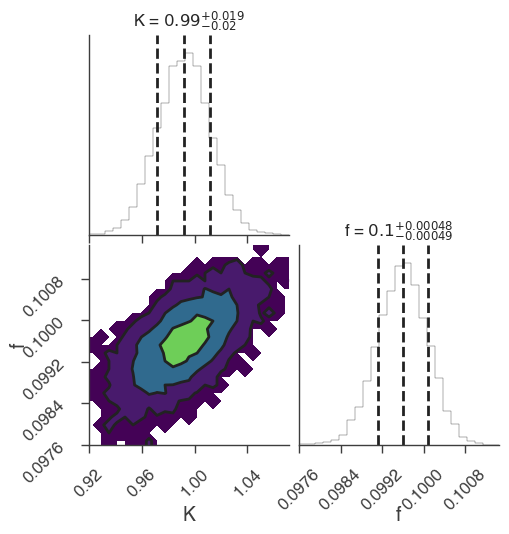

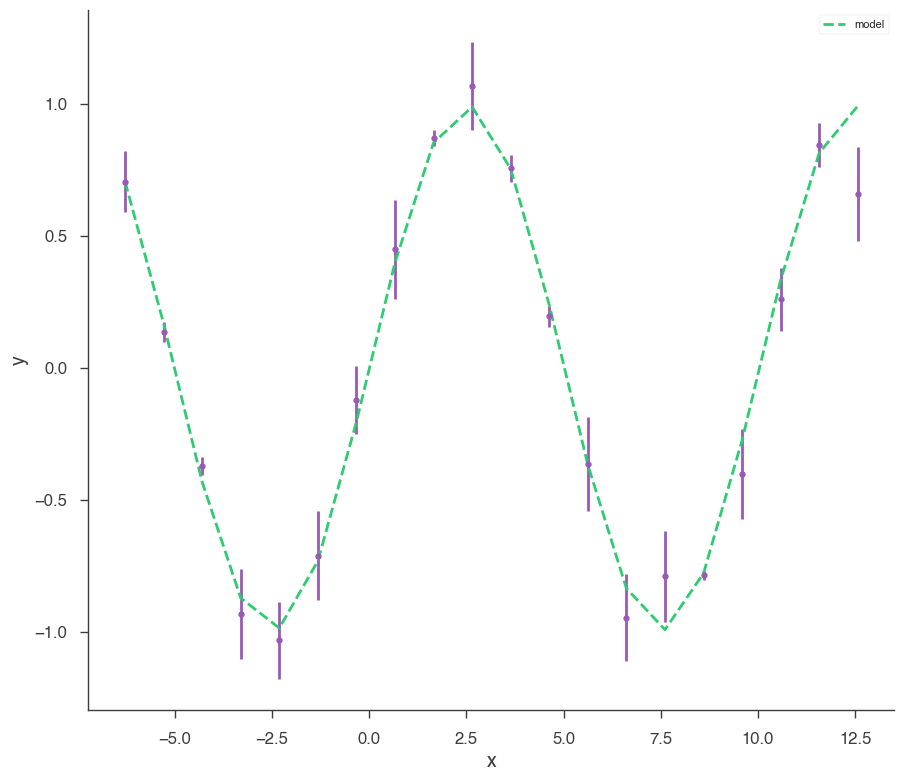

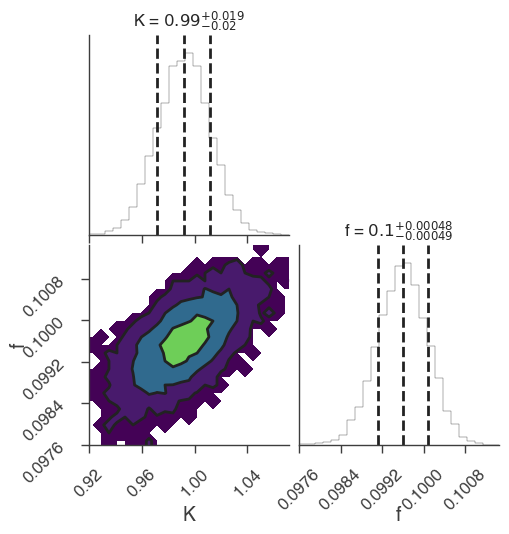

In [9]:
bayes_analysis.set_sampler("zeus")
bayes_analysis.sampler.setup(n_walkers=20, n_iterations=500)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()

## ultranest

22:23:14 INFO      sampler set to ultranest                                                ]8;id=472479;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py\bayesian_analysis.py]8;;\:]8;id=943542;file:///Users/runner/work/threeML/threeML/threeML/bayesian/bayesian_analysis.py#197\197]8;;\

[ultranest] Sampling 400 live points from prior ...


[ultranest] Explored until L=-7  


[ultranest] Likelihood function evaluations: 8654


[ultranest]   logZ = -15.86 +- 0.09925


[ultranest] Effective samples strategy satisfied (ESS = 972.8, need >400)


[ultranest] Posterior uncertainty strategy is satisfied (KL: 0.46+-0.06 nat, need <0.50 nat)


[ultranest] Evidency uncertainty strategy is satisfied (dlogz=0.42, need <0.5)


[ultranest]   logZ error budget: single: 0.14 bs:0.10 tail:0.41 total:0.42 required:<0.50


[ultranest] done iterating.


22:23:33 INFO      fit restored to maximum of posterior                                         ]8;id=392440;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=176275;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

         INFO      fit restored to maximum of posterior                                         ]8;id=44792;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py\sampler_base.py]8;;\:]8;id=890447;file:///Users/runner/work/threeML/threeML/threeML/bayesian/sampler_base.py#178\178]8;;\

Maximum a posteriori probability (MAP) point:

,result,unit
parameter,,
demo.spectrum.main.Sin.K,(9.93 -0.19 +0.21) x 10^-1,1 / (cm2 keV s)
demo.spectrum.main.Sin.f,(9.96 +/- 0.05) x 10^-2,rad / keV


Values of -log(posterior) at the minimum:

,-log(posterior)
demo,-6.559412
total,-6.559412


Values of statistical measures:

,statistical measures
AIC,17.824707
BIC,19.110289
DIC,17.124000
PDIC,2.001931
log(Z),-6.887829


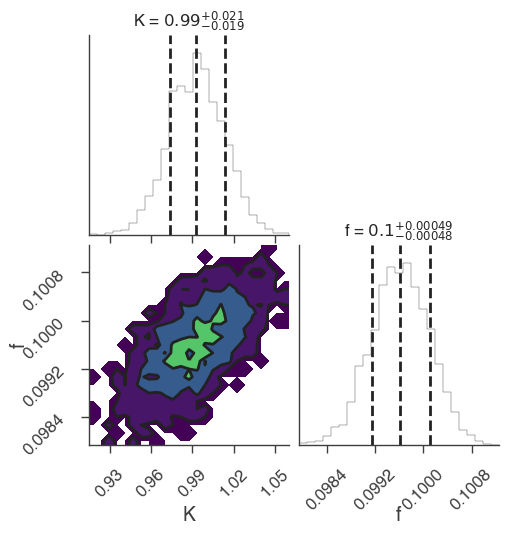

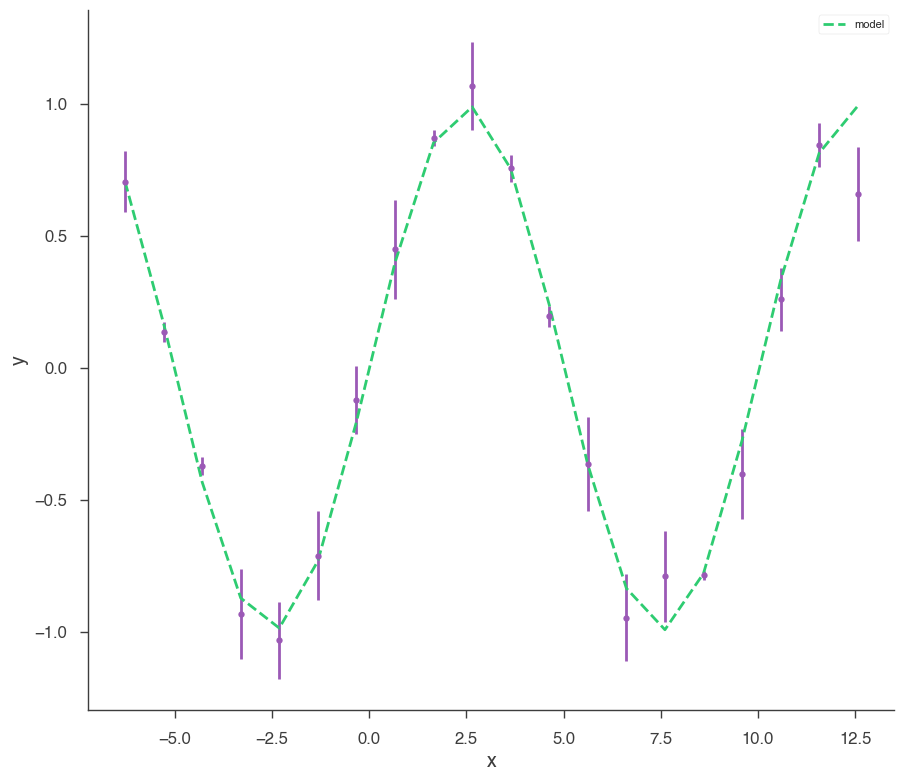

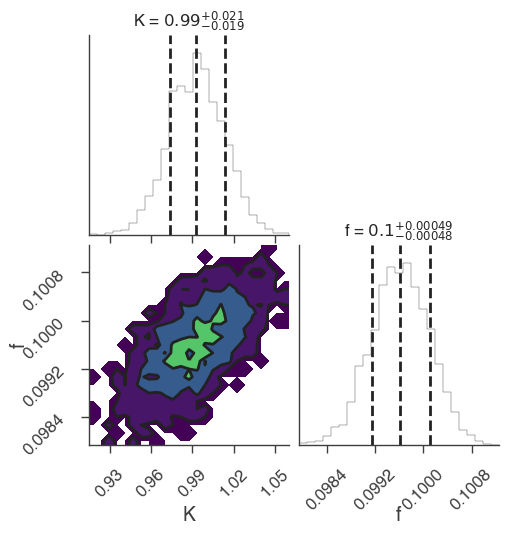

In [10]:
bayes_analysis.set_sampler("ultranest")
bayes_analysis.sampler.setup(
    min_num_live_points=400, frac_remain=0.5, use_mlfriends=False
)
bayes_analysis.sample()

xyl.plot()
bayes_analysis.results.corner_plot()